<img src="https://raw.githubusercontent.com/Kmilo29/repository/main/images/encabezado.png" ><br>

# **MINE-4101: Ciencia de Datos Aplicada**
## **Universidad de los Andes**
Segundo Semestre - 2023


## **Estudiante**

*   Ivan Camilo Delgado Cañon


# **ENTREGA TALLER 2** 

## **Tema: Regresión**


### **Contexto de negocio:** Apoyo del Banco Mundial a países en desarrollo.

El Banco Mundial es una organización internacional que se dedica a brindar apoyo financiero y técnico a países en desarrollo mediante préstamos para proyectos de infraestructura, sectoriales, institucionales, entre otros, buscando mejorar el bienestar económico y social de su población. El diseño de políticas de préstamos más informadas y adaptadas a las necesidades y realidades de cada país no solo maximiza la probabilidad de que los préstamos sean reembolsados en su totalidad, sino que también asegura que los fondos se utilicen de manera efectiva en las necesidades reales del territorio.

Históricamente, el Producto Interno Bruto (PIB) ha sido uno de los indicadores clave para evaluar la capacidad de pago de un país. Sin embargo, si bien existen reportes anuales del PIB de los países, aún no se entiende a la perfección con qué otros indicadores como tasa de empleo, acceso a internet, expectativa de vida, entre otros, se encuentra relacionado.

## **Objectivos**

- Mediante el uso de modelos de regresión lineal, en conjunto con técnicas de preparación y exploración de datos, se espera extraer y entender las relaciones que puedan existir entre el PIB de un país y otros indicadores disponibles.

- Definir un conjunto de políticas públicas asociadas a la mejora de los indicadores que el modelo de regresión logre identificar como más relevantes relacionados al PIB.

## **Dataset de trabajo**

El dataset fue construido por la organización [Gapminder](https://www.gapminder.org/data/), quienes han hecho la labor de, a partir de múltiples fuentes, integrar indicadores por país para un periodo aproximado de tiempo. A continuación encuentra el dataset y el diccionario de datos correspondiente:


**Fuente de Datos**: Gapminder. [[dataset](https://drive.google.com/file/d/1zsFX4PUehK_rmLtP-1hqPnSo86VMHDAm/view) | [dictionary](https://drive.google.com/file/d/12kCZLW8i9a4YzNNdCTAU5SSjIEIyTMWs/view)].

### **Diccionario de datos**

| Campo                 | Descripción                                                                                                         |
|:----------------------|:--------------------------------------------------------------------------------------------------------------------|
| country               | Identificador único del país                                                                                      |
| incomeperperson       | Producto Interno Bruto (PIB) per cápita en el año 2010 en dólares estadounidenses constantes de 2000. Se ha tenido en cuenta la inflación pero no las diferencias en el costo de vida entre países. |
| alcconsumption        | Consumo de alcohol por adulto en el año 2008 (edad 15+), en litros. Consumo promedio registrado y estimado de alcohol por adulto (15+) per cápita en litros de alcohol puro.          |
| armedforcesrate       | Personal de las fuerzas armadas (% del total de la fuerza laboral)                                                  |
| breastcancerper100TH | Nuevos casos de cáncer de mama en el año 2002 por cada 100,000 mujeres. Número de nuevos casos de cáncer de mama por cada 100,000 mujeres residentes durante un año determinado.    |
| co2emissions          | Emisiones acumuladas de CO2 en el año 2006 (toneladas métricas). Cantidad total de emisiones de CO2 en toneladas métricas desde 1751.                          |
| femaleemployrate      | Empleo de mujeres en el año 2007 (% de la población). Porcentaje de la población femenina mayor de 15 años que ha estado empleada durante el año dado.                      |
| HIVrate               | Prevalencia estimada del VIH en el año 2009 (% de la población de 15 a 49 años). Número estimado de personas que viven con VIH por cada 100 habitantes en el grupo de edad de 15 a 49 años. |
| Internetuserate       | Usuarios de Internet en el año 2010 (por cada 100 personas). Usuarios de Internet son personas con acceso a la red mundial. |
| lifeexpectancy        | Esperanza de vida al nacer en el año 2011 (años). Promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran iguales. |
| oilperperson          | Consumo de petróleo per cápita en el año 2010 (toneladas por año y persona). |
| polityscore           | Puntaje de democracia en el año 2009 (Polity). Puntaje general de polidad del conjunto de datos Polity IV, calculado restando un puntaje de autocracia de un puntaje de democracia. La medida resumida de la naturaleza democrática y libre de un país. -10 es el valor más bajo, 10 es el más alto. |
| relectricperperson    | Consumo de electricidad residencial per cápita en el año 2008 (kWh). Cantidad de consumo de electricidad residencial por persona durante el año dado, medido en kilovatios-hora (kWh). |
| suicideper100TH       | Tasa de suicidio, ajustada por edad, por cada 100,000 personas. Mortalidad debida a lesiones autoinfligidas, por cada 100,000 habitantes de una población estándar, ajustada por edad. |
| employrate            | Empleo total de personas mayores de 15 años en el año 2007 (% de la población). Porcentaje de la población total mayor de 15 años que ha estado empleada durante el año dado. |
| urbanrate             | Población urbana (% del total). Población urbana se refiere a las personas que viven en áreas urbanas según la definición de las oficinas nacionales de estadística (calculado utilizando estimaciones de población del Banco Mundial y proporciones urbanas de las Perspectivas de Urbanización Mundial de las Naciones Unidas). |

## **1. Entendimiento de los datos**

En este paso, se realiza un análisis de los datos con el objetivo de identificar las características clave del conjunto de datos (dimensiones del dataset), los tipos de datos presentes y los cinco atributos más relevantes para el ejercicio de regresión. Para cada atributo, se lleva a cabo un análisis univariado que proporciona información básica sobre su comportamiento y distribución. Además, se realiza un análisis bivariado para comprender las relaciones entre pares de indicadores, complementando así nuestra comprensión de los datos.

### **Obtener los datos**

**Importar las librerías requeridas**

In [1]:
# !pip install pycountry-convert

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Data management Libraries
import pandas as pd
import numpy as np

# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score

# Aditional libraries
from scipy import stats

# Utils
import utils_functions as utils

**Lectura de los datos**

In [3]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 175)

In [4]:
# create the dataFrame 
dataframe = pd.read_csv('https://raw.githubusercontent.com/Kmilo29/repository/main/data/taller2/gapminder_final.csv')

In [5]:
# Data visualization
dataframe.head(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08


### **Análisis inicial de los datos (REPORTE)**

**Dimensiones del dataset**

Con la propiedad **shape** del dataframe visualizamos las dimensiones del dataset:

In [6]:
dataframe.shape

(178, 16)

178 registros y 16 atributos.

**Tipos de dato del dataset**

Para clasificar los datos en nuestro conjunto de datos, podemos utilizar el método **info()** del dataframe. Este método nos proporciona información detallada sobre los datos cargados, lo que nos permite identificar diversas características iniciales. Entre estas características se incluyen el tipo de dato de cada campo, si el campo tiene un valor o si es nulo, así como el tamaño total del conjunto de datos en memoria.

In [7]:
# Showing dataframe information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null    float64
 5   co2emissions          176 non-null    float64
 6   femaleemployrate      177 non-null    float64
 7   hivrate               155 non-null    float64
 8   internetuserate       174 non-null    float64
 9   lifeexpectancy        178 non-null    float64
 10  oilperperson          67 non-null     float64
 11  polityscore           167 non-null    float64
 12  relectricperperson    141 non-null    float64
 13  suicideper100th       178 non-null    float64
 14  employrate            177 non-null    float64
 15  urbanrate             1

### **Porcentaje de completitud de los datos**

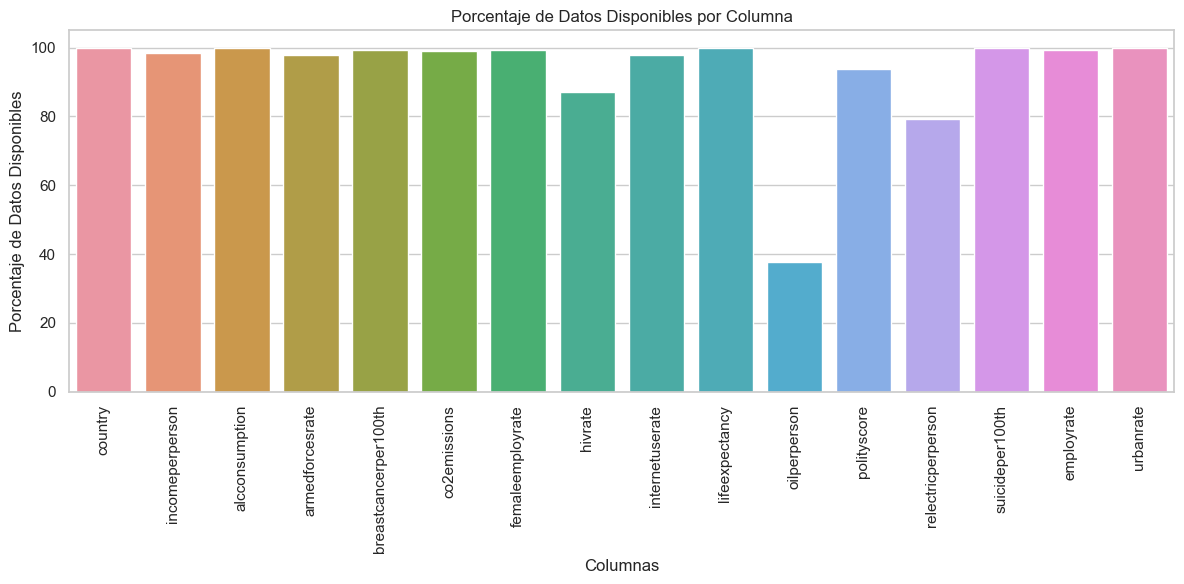

In [8]:
data_percentage = (dataframe.notnull().sum() / len(dataframe)) * 100
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=data_percentage.index, y=data_percentage)
plt.title('Porcentaje de Datos Disponibles por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Disponibles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Selección de atributos más importantes para el ejercicio de regresión**

Como primer paso para la creación de nuestro modelo de regresión vamos a definir nuestra variable target.

    El Producto Interno Bruto (PIB) es una medida que se utiliza para cuantificar el valor total de mercado de todos los bienes y servicios finales producidos dentro de un país durante un período de tiempo específico, generalmente un año. En otras palabras, el PIB representa el valor económico de toda la producción de bienes y servicios dentro de las fronteras de un país en un período determinado.

    El PIB es un indicador clave para evaluar la salud y el tamaño de una economía, ya que proporciona información sobre la actividad económica general de un país. Se utiliza para comparar el rendimiento económico entre diferentes países, medir el crecimiento económico a lo largo del tiempo y analizar la producción y la capacidad económica de una nación.

    El PIB se calcula de varias formas, pero las dos metodologías principales son el enfoque del gasto, que suma el gasto en consumo, inversión, gasto público y exportaciones netas, y el enfoque de la producción, que suma el valor agregado de todos los sectores de la economía (agricultura, industria, servicios, etc.).

En nuestro dataset el PBI se registra en la variable **incomeperperson**. Para poder tener un mejor contexto de cuales son las variables que más nos pueden servir como predictores para nuestro modelo de regresión, vamos a analizar la correlación que existe entre la variable target y las demás variables del dataset.

In [9]:
# Correlation matrix
correlation_matrix = dataframe.corr()

In [10]:
correlation_matrix["incomeperperson"].sort_values(ascending=False)

incomeperperson         1.000000
internetuserate         0.801176
breastcancerper100th    0.737577
relectricperperson      0.638436
lifeexpectancy          0.599883
urbanrate               0.570350
oilperperson            0.527111
alcconsumption          0.309332
polityscore             0.304116
co2emissions            0.283126
femaleemployrate        0.030164
suicideper100th         0.015801
employrate             -0.002454
armedforcesrate        -0.010565
hivrate                -0.196252
Name: incomeperperson, dtype: float64

### **Hallazgos iniciales**

**Atributo identificador único**

- **country**

La variable **country** es tomado en el dataset como un identificador de cada registro, por lo cual no nos sirve como variable predictora. Sin embargo podemos crear una nueva variable llamada **continent** la cual nos permita tener una agrupación de los países la cual puede ser útil para el modelo. 


**Atributos con poca correlación**

Haciendo uso del diccionario de datos, de la información del dataset y con base en la correlación de la variable target con los demás atributos del dataset, inicialmente podemos ver que las variables con una menor correlación son las que por el contexto del negocio podrían no tener una relación tan directa en el cálculo del PIB, entre estas variable tenemos:
               
- **hivrate**                
- **armedforcesrate**
- **suicideper100th**  
- **femaleemployrate**
- **alcconsumption**

Se puede pensar que la variable **femaleemployrate** al ser un atributo que describe el tamaño de una fuerza laboral podría ser un buen indicador, sin embargo puede que no sea el caso debido a que al realizar el cálculo del PBI no se realice una división de género en la población laboral.


**Atributos con resultados inesperados**

- **employrate**: Aunque inicialmente parecía una elección obvia debido a su relación aparente con el PIB, su correlación resultó ser más baja de lo esperado. Por lo tanto, no se incluirá en nuestro modelo.

- **breastcancerper100TH**: A pesar de tener una correlación elevada con el PIB per cápita, su inclusión en el modelo podría no tener una alta relevancia para dar soporte un análisis en el contexto del problema que estamos trabajando, por lo tanto no se utilizará como variable predictora.


**Atributos con pocos datos**

- **oilperperson**: Aunque el consumo de petróleo per cápita puede estar relacionado con el desarrollo económico, la falta de datos para esta variable, solo un 37.64 % de completitud, la hace menos confiable como predictor.

- **relectricperperson**: Aunque el consumo de electricidad residencial per cápita refleja el nivel de acceso a la electricidad y la demanda de servicios eléctricos en los hogares puede estar relacionado con la calidad de vida, el desarrollo industrial y la infraestructura eléctrica de un país, la falta de datos para esta variable, un 79.21 % de completitud implicaría hacer algún tipo de imputación para un porcentaje de datos del 20.79% lo cual no se recomienda, por lo tanto no se utilizará como variable predictora.
<br/>


### **Top 5 de atributos más importante**

Con base en lo anterior los atributos que se seleccionaron fue debido a su relevancia potencial para explicar las variaciones en el PIB per cápita y su relación con el desarrollo económico y social. Los 5 atributos seleccionados para nuestro modelo de regresión son:

#### **Variables Cuantitativas**

**Continuas**

- **internetuserate (Tasa de Usuarios de Internet):** Representa el acceso y la conectividad a Internet, lo que está relacionado con el desarrollo tecnológico y la información disponible para la población. Un mayor acceso a Internet se asocia generalmente con un mayor desarrollo económico.
<br/><br/>

- **lifeexpectancy (Esperanza de Vida):** Este atributo refleja la calidad de vida, el acceso a servicios de salud y el bienestar general de la población. Países con una esperanza de vida más alta suelen tener mejores condiciones económicas y sociales.
<br/><br/>

- **urbanrate (Tasa de Población Urbana):** La urbanización está relacionada con el desarrollo económico y la infraestructura. Países con una alta tasa de población urbana tienden a tener una mayor actividad económica en sus áreas urbanas, lo que puede influir en el PIB per cápita.
<br/><br/>

- **co2emissions (Emisiones de dióxido de carbono (CO2)):** está relacionada con la actividad económica de un país. Cuanto más desarrollada es una economía, generalmente se observa un aumento en las emisiones de CO2 debido a la mayor producción industrial, el consumo de energía y el transporte. Por lo tanto, las emisiones de CO2 pueden ser un indicador indirecto del desarrollo económico del pais.
<br/><br/>

**Discretas**

- **polityscore (puntuación política)**: Es un atributo importante para comprender la calidad y la naturaleza de la gobernanza en un país. Puede ser utilizado para analizar la estabilidad política y evaluar la relación entre la democracia y el desarrollo económico.
<br/><br/>

## **Análisis univariado**

A continuación se realizará el análisis inicial para cada uno de los atributos seleccionados y para la variable target **incomeperperson** con la cual iniciaremos.

### **Variable target (incomeperperson)**

In [11]:
dataframe['incomeperperson'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.85, 0.90, 0.95])

count      175.000000
mean      7553.392250
std      11074.571742
min        103.775857
5%         241.729899
25%        609.744287
50%       2425.471293
75%       8880.432039
85%      18793.288361
90%      26161.247592
95%      32954.632381
max      52301.587180
Name: incomeperperson, dtype: float64

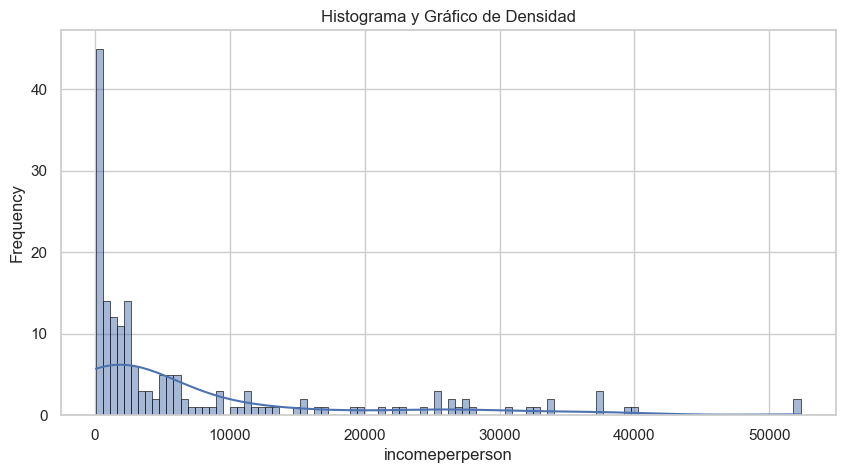

In [12]:
# Histogram and density plot
plt.figure(figsize=(10, 5))
sns.histplot(dataframe['incomeperperson'], bins=100, kde=True, edgecolor='k')
plt.title("Histograma y Gráfico de Densidad")
plt.xlabel('incomeperperson')
plt.ylabel('Frequency')
plt.show()

In [13]:
dataframe.shape

(178, 16)

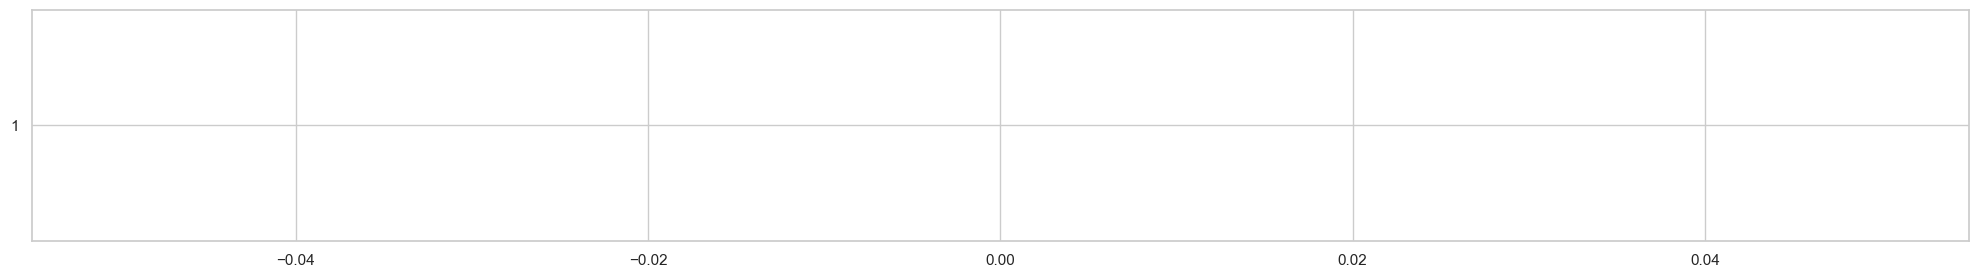

In [14]:
plt.figure(figsize=(25, 3))
plt.boxplot(dataframe['incomeperperson'], showmeans=True, vert=False)
plt.show()

Esta variable tiene valores outlier extremos lo que hace dificil la visualización

Limitamos los valores a que el limite superior sea el percentil 90

In [15]:
dataframe_no_outliers = dataframe.loc[dataframe['incomeperperson'] <= dataframe['incomeperperson'].quantile(.9)]

In [16]:
dataframe_no_outliers.shape

(157, 16)

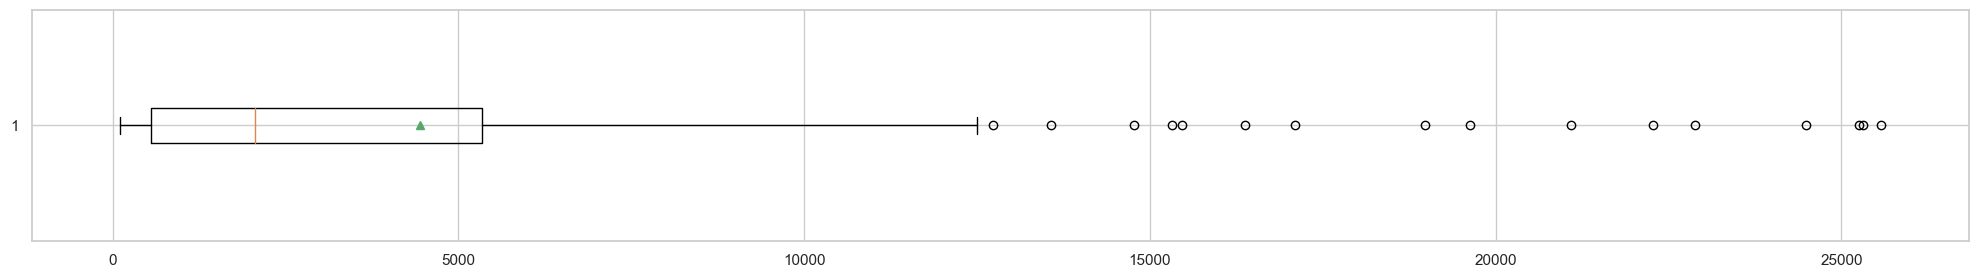

In [17]:
plt.figure(figsize=(25, 3))
plt.boxplot(dataframe_no_outliers['incomeperperson'], showmeans=True, vert=False)
plt.show()

In [18]:
dataframe_no_outliers['incomeperperson'].describe(percentiles=[.25, .5, .75, .95, .99])

count      157.000000
mean      4447.929840
std       5971.953797
min        103.775857
25%        558.062877
50%       2062.125152
75%       5348.597192
95%      19111.923542
99%      25274.714557
max      25575.352620
Name: incomeperperson, dtype: float64

### **Resultados del análisis variable target**

Los resultados de la variable target exhiben valores que se distancian significativamente de la mayoría de los otros valores en el conjunto de datos. Estos valores atípicos, conocidos como **outliers**, pueden ejercer un impacto desproporcionado en la capacidad del modelo de regresión para ajustarse adecuadamente a los datos y realizar predicciones precisas.

Los outliers pueden distorsionar la relación entre las variables predictoras y la variable objetivo, lo que conduce a un modelo que no refleja fielmente la verdadera distribución de los datos. Por lo tanto, es fundamental tener en cuenta este aspecto durante la etapa de **Preparación de datos.**

### **Variables cuantitativas continuas**

In [19]:
# selected columns
continuous_features = ['internetuserate', 'lifeexpectancy', 'urbanrate', 'co2emissions']

In [20]:
# Information of the continuos features
dataframe[continuous_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   internetuserate  174 non-null    float64
 1   lifeexpectancy   178 non-null    float64
 2   urbanrate        178 non-null    float64
 3   co2emissions     176 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


---------------------------------------------------------------------------------------------
--------------------------------------internetuserate--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    174.000000
mean      34.740125
std       28.088371
min        0.210066
5%         1.700015
25%        9.924668
50%       29.939930
75%       55.973228
95%       83.607776
max       95.638113
Name: internetuserate, dtype: float64


Número de registros nulos: 4


Número de registros con valor cero: 0




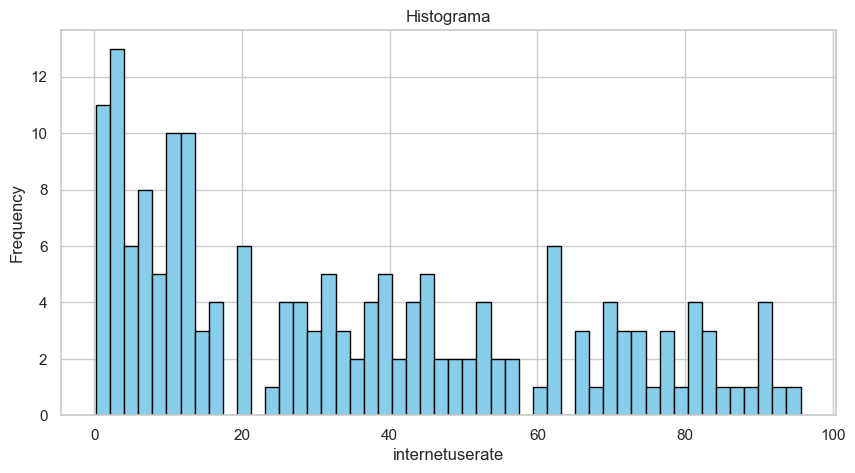

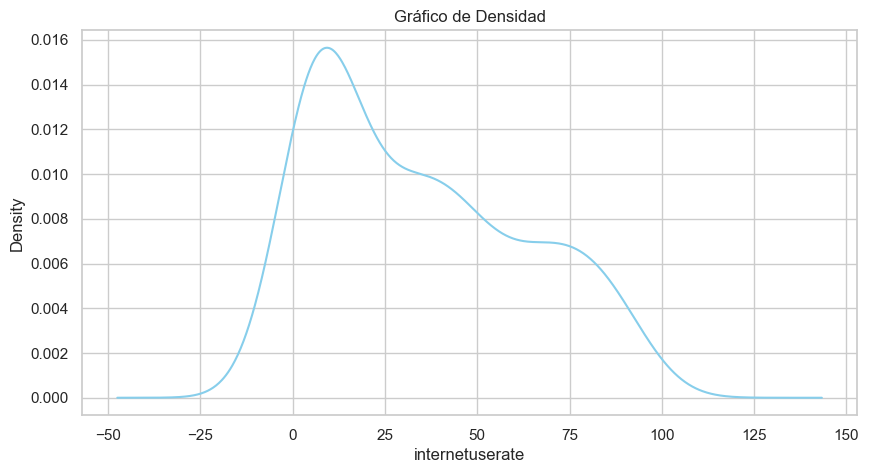

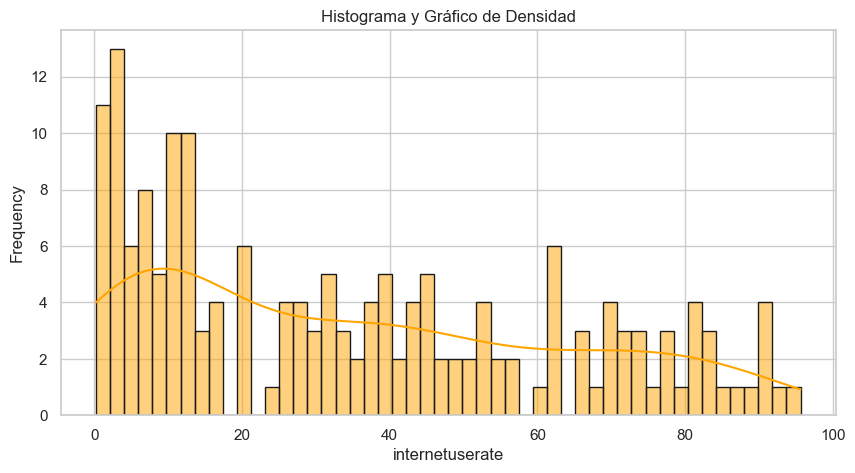




---------------------------------------------------------------------------------------------
--------------------------------------lifeexpectancy--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    178.000000
mean      69.414949
std        9.808335
min       47.794000
5%        50.136100
25%       62.725000
50%       72.974000
75%       76.127500
95%       81.409250
max       83.394000
Name: lifeexpectancy, dtype: float64


Número de registros nulos: 0


Número de registros con valor cero: 0




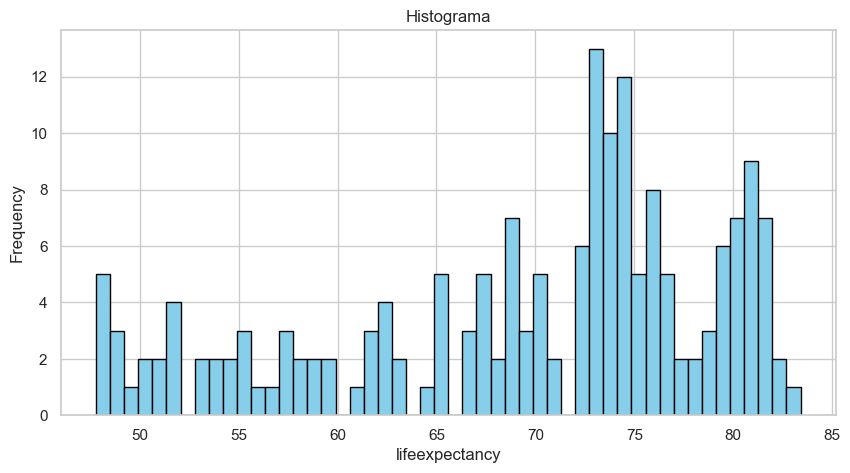

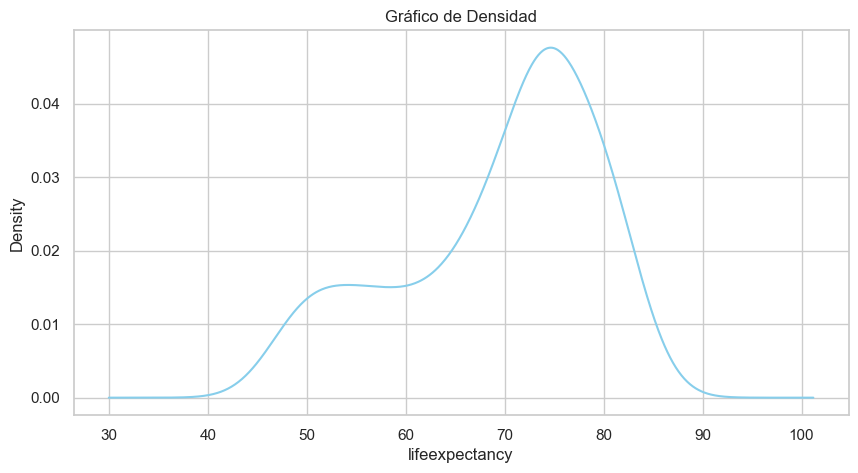

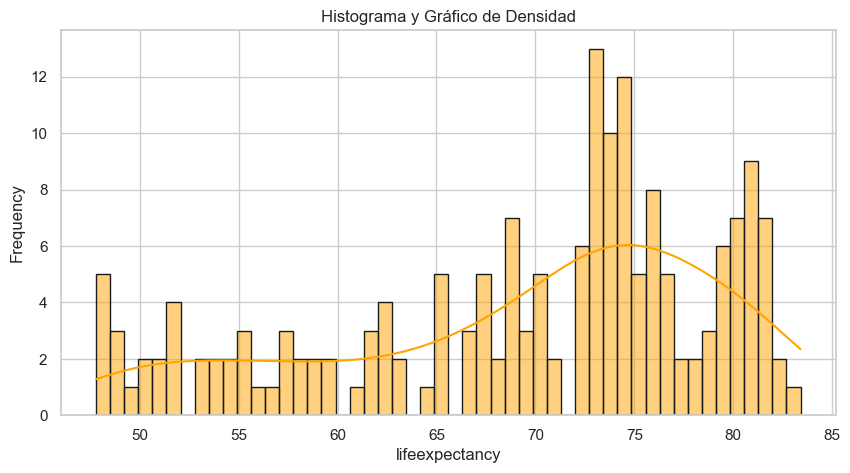




---------------------------------------------------------------------------------------------
--------------------------------------urbanrate--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    178.000000
mean      56.282135
std       22.561796
min       10.400000
5%        18.283000
25%       36.965000
50%       59.600000
75%       73.460000
95%       91.711000
max      100.000000
Name: urbanrate, dtype: float64


Número de registros nulos: 0


Número de registros con valor cero: 0




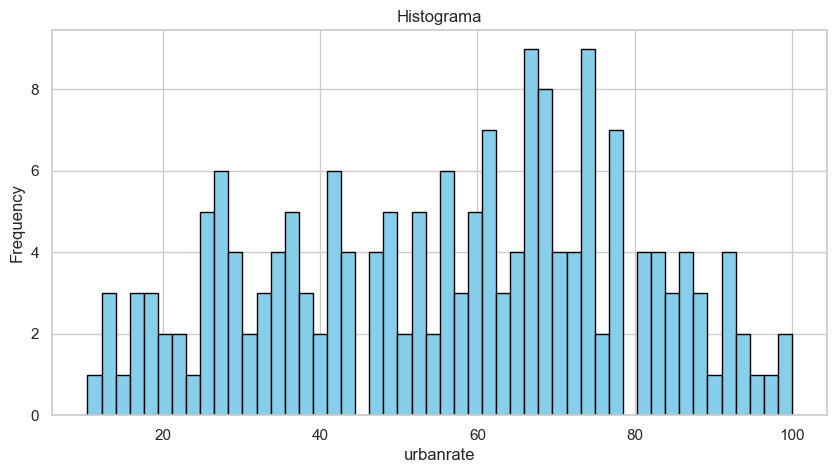

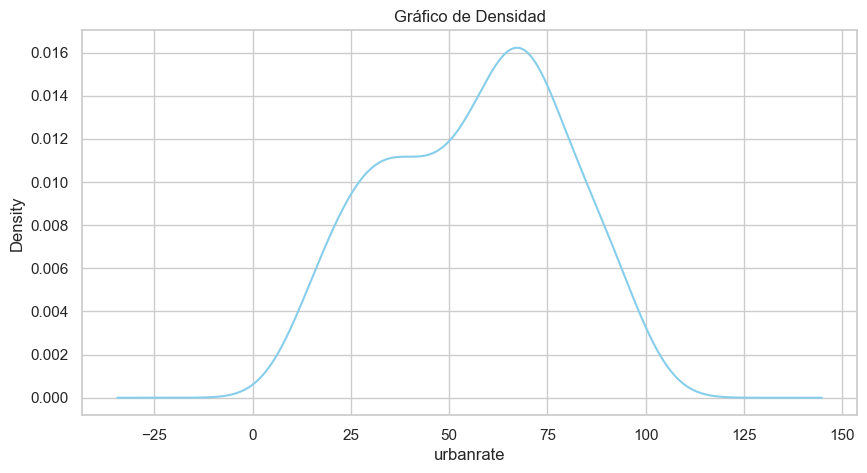

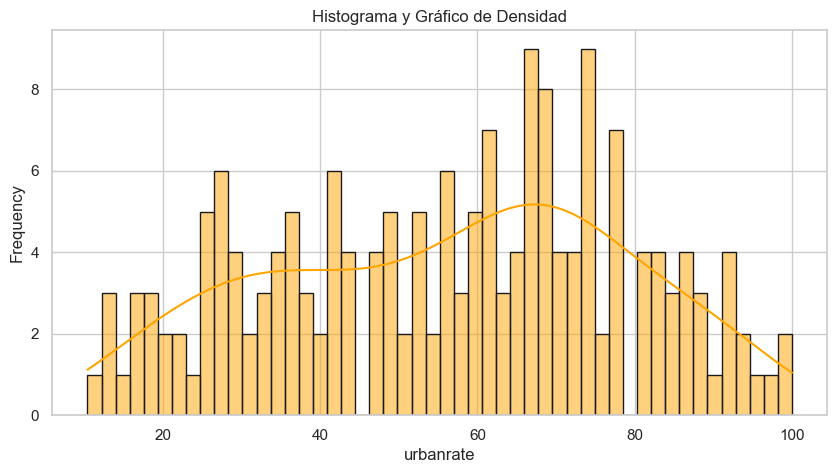




---------------------------------------------------------------------------------------------
--------------------------------------co2emissions--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    1.760000e+02
mean     5.757754e+09
std      2.734690e+10
min      8.506667e+05
5%       8.022667e+06
25%      8.755725e+07
50%      3.054792e+08
75%      2.391801e+09
95%      2.314134e+10
max      3.340000e+11
Name: co2emissions, dtype: float64


Número de registros nulos: 2


Número de registros con valor cero: 0




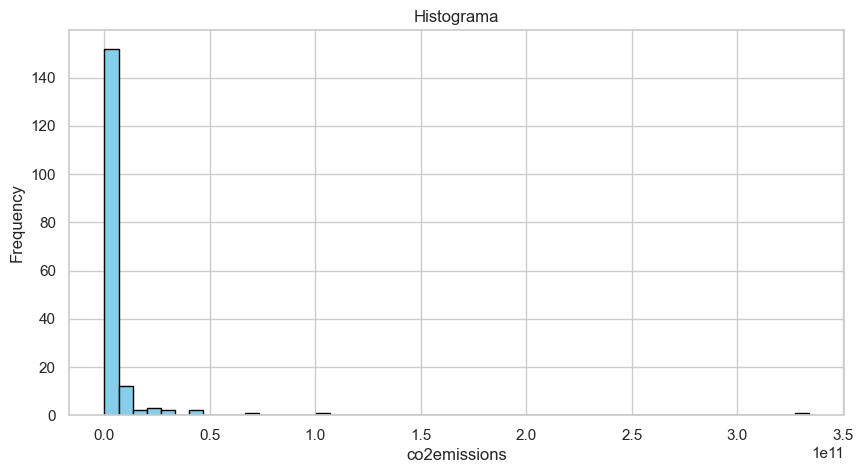

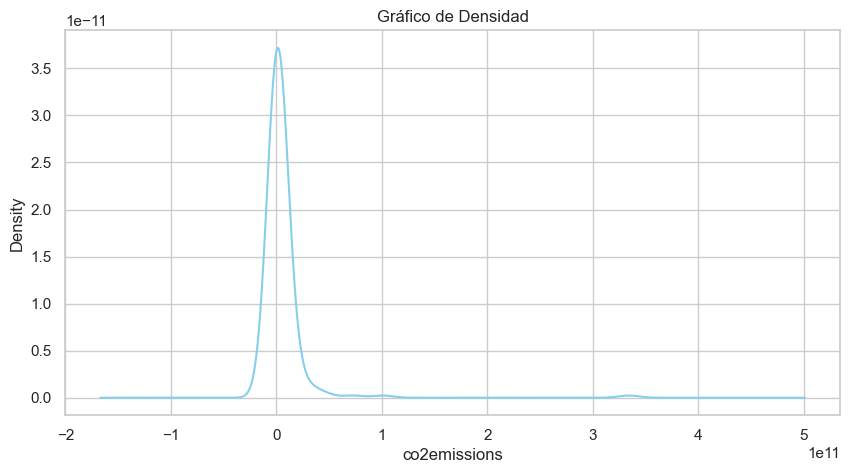

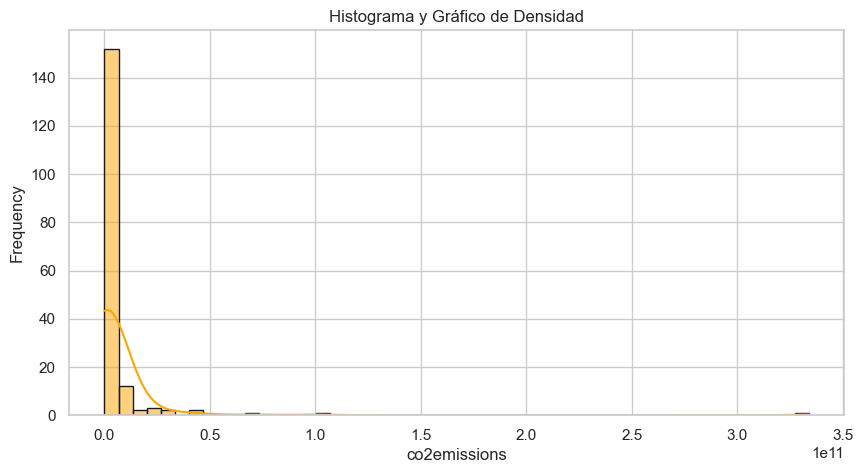

In [21]:
# univariate analysis continuos variables
utils.univariate_analysis_continuos_variables(dataframe[continuous_features])

### **Resultados del análisis variables cuantitativas continuas**

Tras el análisis detallado de las variables continuas, se han obtenido varias conclusiones significativas:

**internetuserate**

Los datos varían desde un mínimo de 0.21 hasta un máximo de 95.64. Este amplio rango de valores refleja una diversidad significativa en la tasa de usuarios de Internet en el conjunto de datos. La presencia de valores tan bajos como 0.21 y tan altos como 95.64 sugiere que existe una gran disparidad en la adopción de Internet en las observaciones.
<br/><br/>    

**lifeexpectancy**

La baja desviación estándar de alrededor de 9.81 en relación con la media sugiere que los datos de la esperanza de vida son relativamente estables y consistentes. Esto indica que, en general, la variabilidad en la esperanza de vida entre los países no es excesivamente alta, lo que podría atribuirse a factores como la atención médica, las condiciones socioeconómicas y la calidad de vida en diferentes países.
<br/><br/>

**urbanrate**

La tasa de urbanización abarca desde un mínimo de 10.40 hasta un máximo de 100.00. Este amplio rango de valores pone de manifiesto una diversidad significativa en los niveles de urbanización entre las observaciones y sugiere que algunos países pueden ser altamente urbanizados, mientras que otros tienen una urbanización mínima. Esta variable puede estar influenciada por factores económicos, sociales, geográficos y políticos, y su análisis puede proporcionar una visión más profunda de la dinámica de un país.
<br/><br/>

**co2emissions**

Existe una amplia variabilidad en las emisiones de CO2 entre los países representados en el conjunto de datos. Esta variabilidad sugiere que diferentes naciones tienen niveles significativamente distintos de emisiones de CO2. Factores como la industrialización, la dependencia de combustibles fósiles y las políticas ambientales pueden contribuir a esta disparidad. Se identifican valores extremos tanto en el extremo inferior como en el superior del rango de emisiones. Algunos países presentan emisiones extremadamente bajas, posiblemente debido a prácticas sostenibles o un bajo desarrollo industrial. Por otro lado, ciertos países exhiben emisiones excepcionalmente altas, lo que puede estar relacionado con la industrialización intensiva o una mayor dependencia de combustibles fósiles.

### **Variable cuantitativa discreta (polityscore)**

---------------------------------------------------------------------------------------------
--------------------------------------polityscore--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    167.000000
mean       3.502994
std        6.423671
min      -10.000000
5%        -7.000000
25%       -2.500000
50%        6.000000
75%        9.000000
95%       10.000000
max       10.000000
Name: polityscore, dtype: float64


Número de registros nulos: 11


Número de registros con valor cero: 5


Los valores unicos son: [ 10.   9.  -1.  nan  -2.  -8.   4.   5.  -5.   8.   0.   7.  -4.  -7.
 -10.   3.   6.   2.  -9.   1.  -3.  -6.]







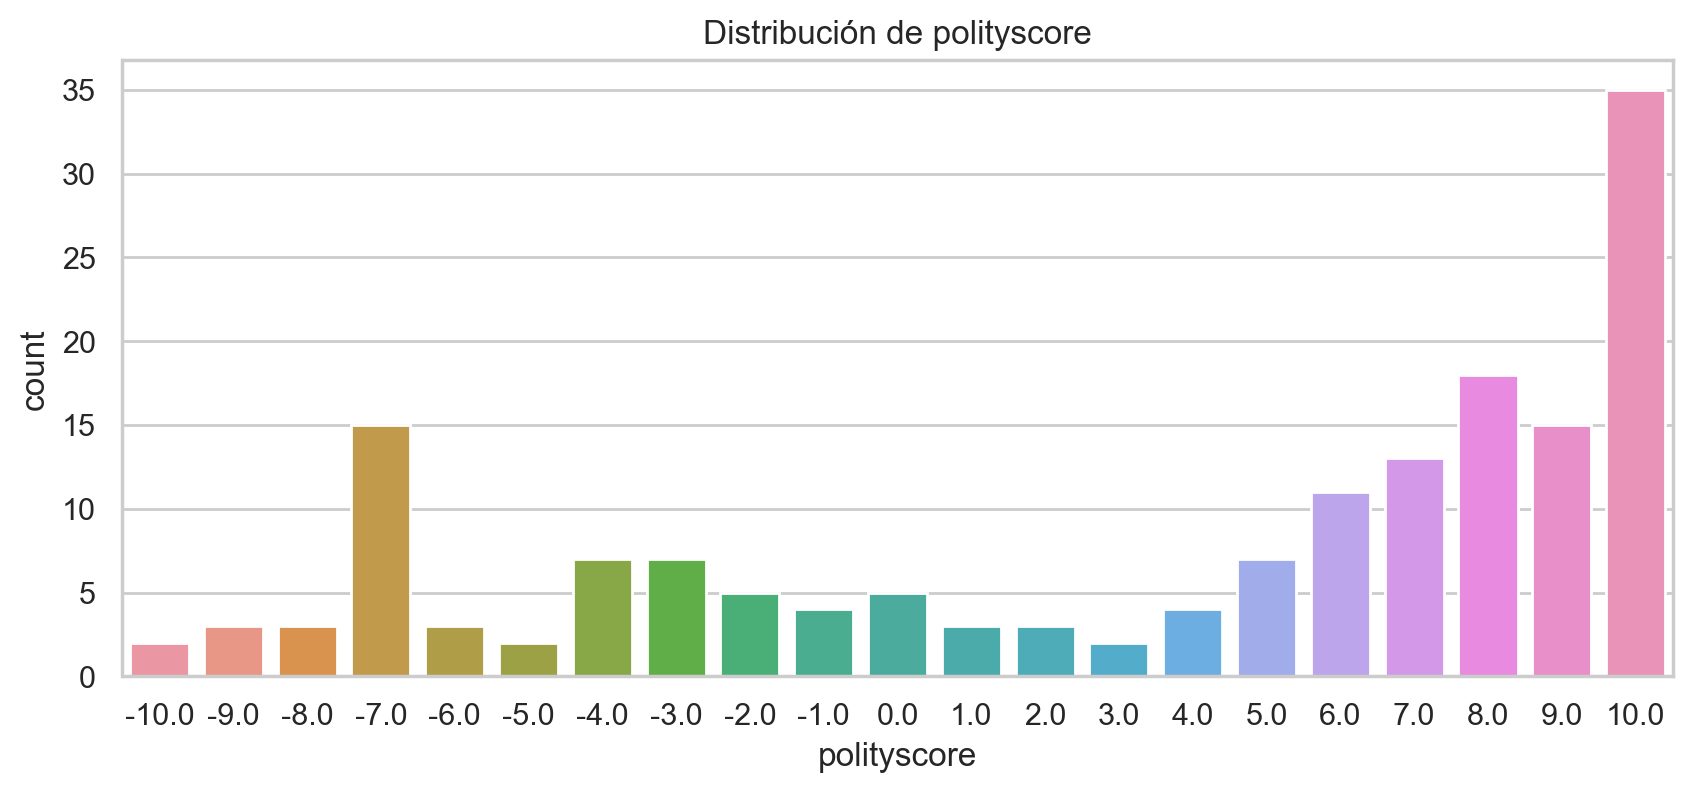

In [22]:
# univariate analysis discrete variables
utils.univariate_analysis_discrete_variables(dataframe[['polityscore']])

### **Resultados del análisis variable cuantitativa discreta**

Para esta variable tenemos una media de aproximadamente 3.50. Esto indica el valor promedio cercano a un sistema político mixto o democrático. La mediana, que es 6.00, sugiere una tendencia hacia sistemas políticos más democráticos en la mayoría de las observaciones. La desviación estándar de alrededor de 6.42 indica una dispersión considerable en los valores de la variable. Esto refleja una variabilidad significativa en los sistemas políticos entre las observaciones, desde sistemas muy autoritarios hasta sistemas altamente democráticos, con una tendencia hacia sistemas más democráticos en la mayoría de las observaciones.

### **Adición de la variable 'continent'**

a continuación, introduciremos una nueva variable llamada **continente**, que agrupará los registros según su respectivo continente. Esta adición se justifica debido a la alta variabilidad de la columna **country**, ya que cada registro corresponde a un país diferente.

In [23]:
## apply the function to the column "country" and create a new column "continent".
dataframe['continent'] = dataframe['country'].apply(utils.identify_continent)

dataframe.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Unknown
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,America
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe


Se valida si hay paises cuyo continente no fue identificado

In [24]:
dataframe[dataframe['continent']=='Unknown']

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.70,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Unknown
18,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90,Unknown
23,"Korea, Rep.",16372.499780,19.15,2.833966,20.4,9.666892e+09,48.000000,0.06,82.515928,80.642,2.087848,8.0,1142.309009,22.404560,58.900002,81.46,Unknown
46,"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64,Unknown
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90,Unknown
92,"Congo, Dem. Rep.",103.775857,3.39,0.628381,10.3,1.691800e+08,50.400002,NaN,0.720009,48.397,NaN,5.0,30.709244,14.713020,66.199997,33.96,Unknown
106,"Congo, Rep.",1253.292015,4.46,0.771694,20.6,4.630633e+07,52.299999,3.40,4.999875,57.379,NaN,-4.0,56.372450,9.873761,64.199997,61.34,Unknown
113,Dominican Rep.,4049.169629,6.28,1.469369,36.1,4.463653e+08,40.500000,0.90,39.531274,73.396,NaN,8.0,457.644842,6.519537,52.700001,69.02,Unknown
142,Cote d'Ivoire,591.067944,6.47,0.233915,26.0,2.287487e+08,38.099998,3.40,2.599974,55.377,NaN,0.0,70.387444,20.317930,59.900002,48.78,Unknown
157,Czech Rep.,7381.312751,16.47,0.515706,58.4,1.776016e+09,47.599998,0.06,68.638133,77.685,0.876778,8.0,1438.780412,12.367980,56.000000,73.50,Unknown


Se corrigen los nombres de los paises no identificados

In [25]:
dataframe['country'] = dataframe['country'].replace('Central African Rep.', 'Central African Republic')
dataframe['country'] = dataframe['country'].replace('Macedonia, FYR', 'North Macedonia')
dataframe['country'] = dataframe['country'].replace('Korea, Rep.', 'South Korea')
dataframe['country'] = dataframe['country'].replace('Yemen, Rep.', 'Yemen')
dataframe['country'] = dataframe['country'].replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo')
dataframe['country'] = dataframe['country'].replace('Congo, Rep.', 'Republic of the Congo')
dataframe['country'] = dataframe['country'].replace('Dominican Rep.', 'Dominican Republic')
dataframe['country'] = dataframe['country'].replace("Cote d'Ivoire", "Côte d'Ivoire")
dataframe['country'] = dataframe['country'].replace('Czech Rep.', 'Czechia')

In [26]:
# Apply the function to the column "country"
dataframe['continent'] = dataframe['country'].apply(utils.identify_continent)

In [27]:
dataframe[dataframe['continent']=='Unknown']

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
164,Timor-Leste,369.572954,0.74,0.234286,NaN,850666.6667,54.700001,NaN,0.210066,62.475,NaN,7.0,NaN,9.633115,67.300003,27.3,Unknown


Se corrige el valor del campo 'continent' para el país 'Timor-Leste'

In [28]:
# Find the index of the record where 'country' is equal to 'Timor-Leste'.
indice_timor_leste = dataframe[dataframe['country'] == 'Timor-Leste'].index[0]

# Assigns 'Asia' to the 'continent' column for that record
dataframe.at[indice_timor_leste, 'continent'] = 'Asia'

Se valida si aun quedan paises sin el continente identificado

In [29]:
# Validates that there is not records with continent values 'Unknown'
len(dataframe[dataframe['continent']=='Unknown'])

0

### **Análisis univariado variable categórica (continent)**

---------------------------------------------------------------------------------------------
--------------------------------------continent--------------------------------------------
---------------------------------------------------------------------------------------------


Los valores unicos son: ['Europe' 'Africa' 'America' 'Asia' 'Oceania']


Frecuencia absoluta

Africa     51
Asia       50
Europe     43
America    29
Oceania     5
Name: continent, dtype: int64


Frecuencia relativa

Africa     0.286517
Asia       0.280899
Europe     0.241573
America    0.162921
Oceania    0.028090
Name: continent, dtype: float64


Número de registros nulos: 0







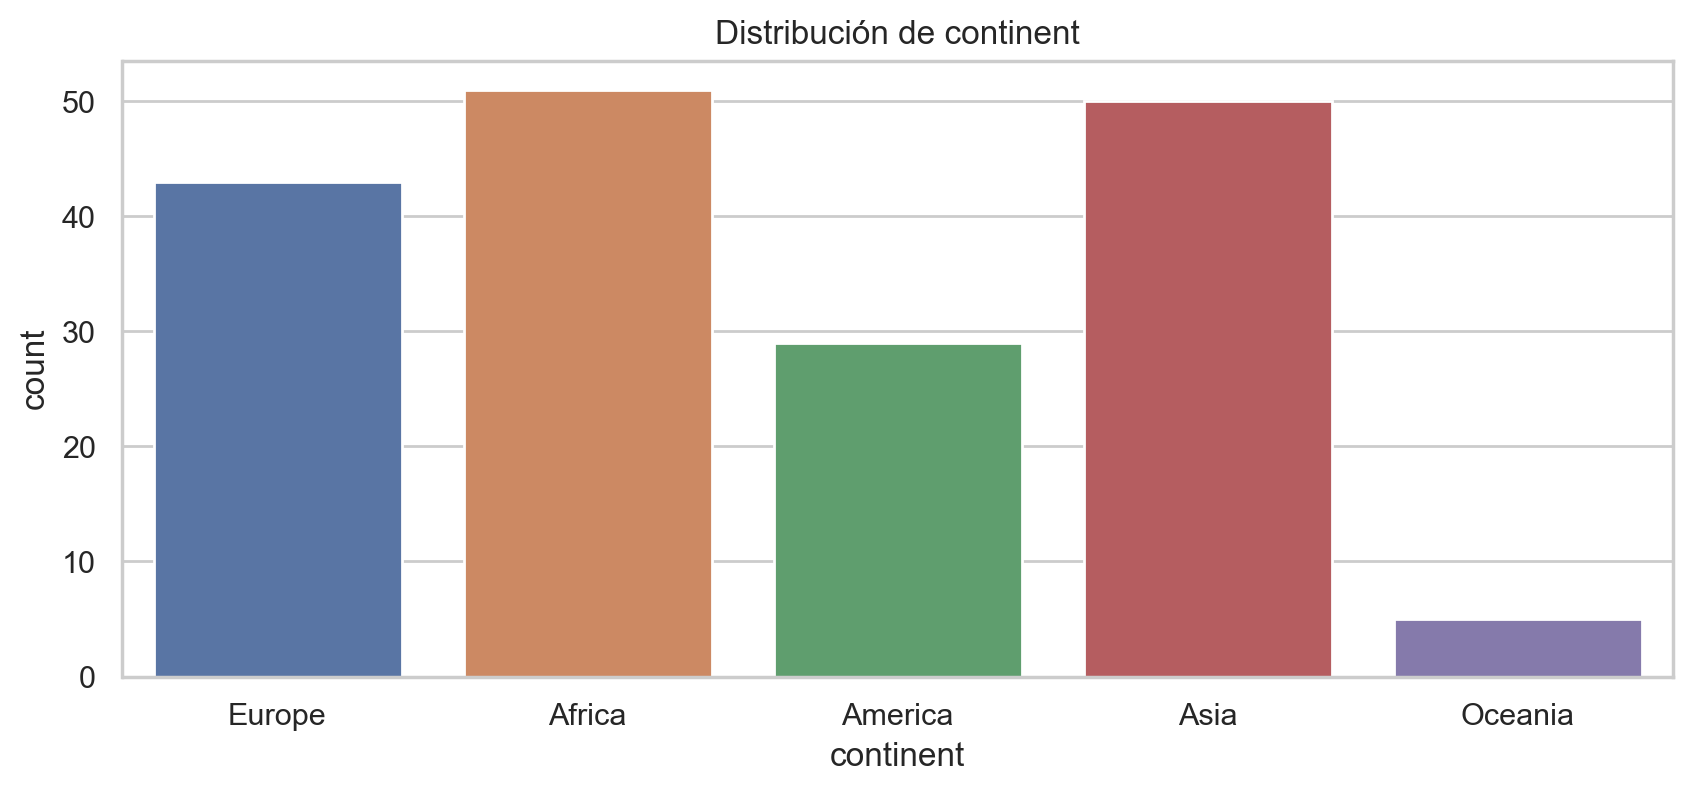

In [30]:
utils.univariate_analysis_categorical_variables(dataframe[['continent']])

### **Resultados del análisis variable categórica**

Al analizar la variable **continent** en nuestro conjunto de datos, hemos obtenido una visión general de la distribución geográfica de los registros. Los porcentajes de registros por continente revelan que África y Asia son las regiones más representadas en nuestro conjunto de datos, cada una contribuyendo con alrededor del 28% del total. Además, Europa representa aproximadamente el 24% del total de registros, lo que también indica una presencia significativa de datos de esta región. Por otro lado, América tienen una representación más baja, con alrededor del 17%, respectivamente, mientras que Oceanía contribuye con aproximadamente el 3% del total. Esto nos permiten comprender mejor la distribución geográfica de nuestros datos y considerar cómo esta distribución podría afectar nuestro análisis y modelos. 

In [31]:
dataframe.head(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe
2,Central African Republic,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Africa
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,America
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe
5,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48,Europe
6,Mauritania,609.131206,0.11,1.551262,28.1,5.681867e+07,45.299999,0.7,2.999803,58.582,NaN,-2.0,NaN,6.882952,46.900002,41.00,Africa
7,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62,Asia
8,Tanzania,456.385712,7.86,0.134730,21.1,1.007820e+08,76.099998,5.6,11.000055,58.199,NaN,-1.0,38.634503,12.411181,78.199997,25.52,Africa
9,Thailand,2712.517199,7.08,1.093651,16.6,4.200940e+09,65.000000,1.3,21.200072,74.126,0.726250,4.0,439.589732,9.847460,72.000000,33.32,Asia


## **Análisis Bivariado**

Para realizar el análisis bivariado, exploraremos la relación entre la variable objetivo **incomeperperson** y las cinco variables seleccionadas.

In [32]:
selected_columns = continuous_features+['polityscore']

### **Diagramas de dispersión**

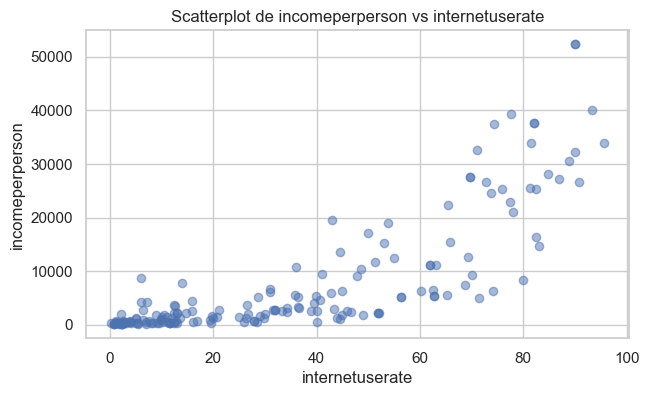

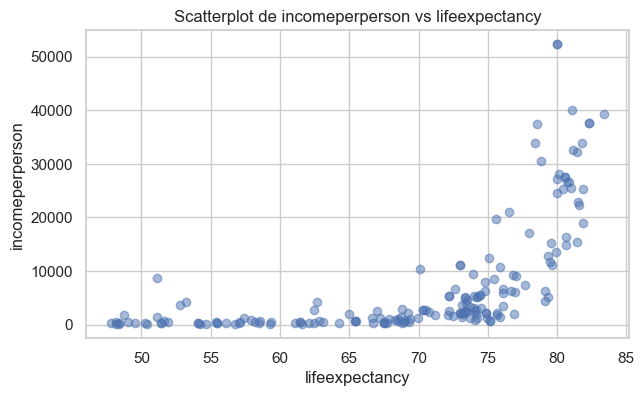

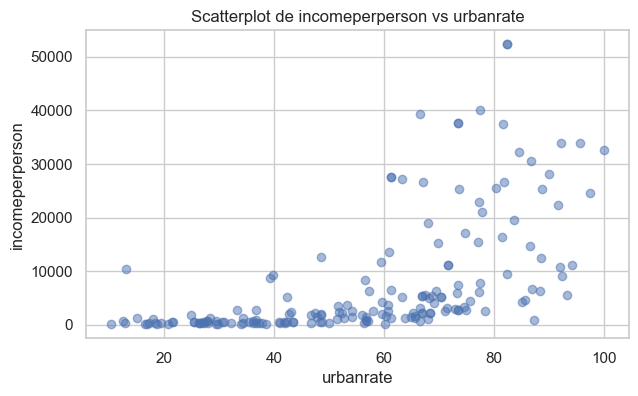

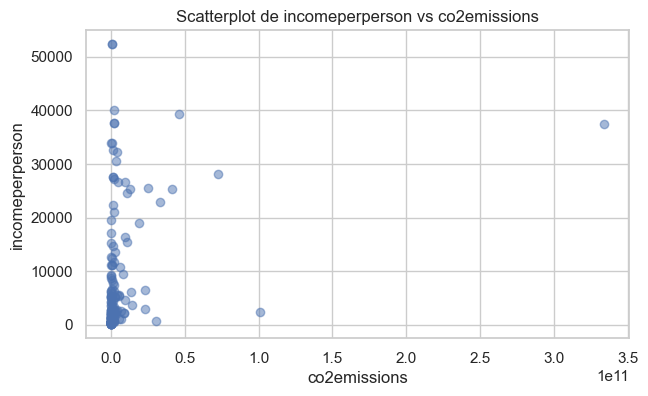

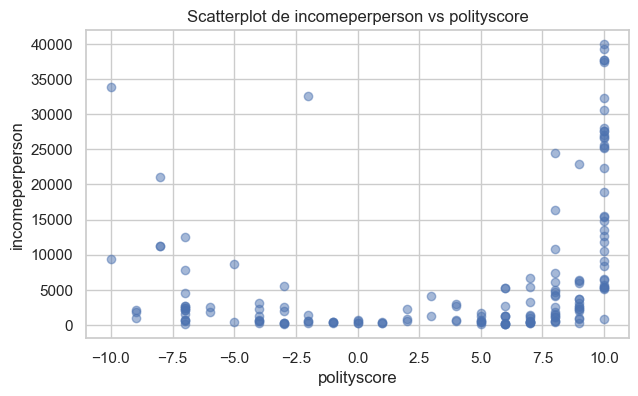

In [33]:
utils.target_vs_features(df=dataframe[selected_columns+['incomeperperson']], target='incomeperperson')

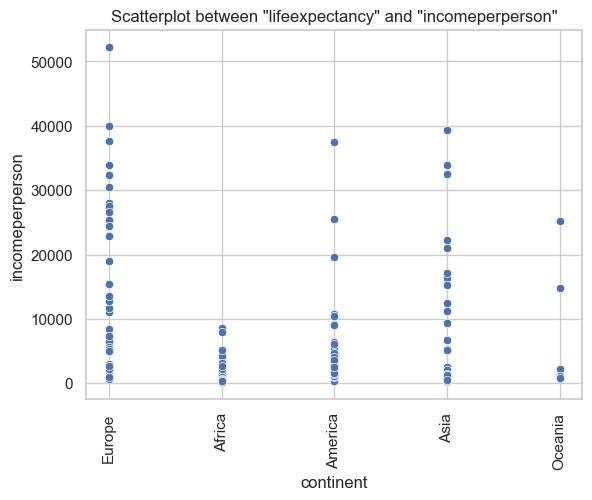

In [34]:
sns.scatterplot(x='continent', y='incomeperperson', data=dataframe)
plt.title('Scatterplot between "lifeexpectancy" and "incomeperperson"')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### **Matriz de correlación**

In [35]:
# features correlation matrix
features_correlation_matrix = dataframe[selected_columns + ['incomeperperson']].corr()

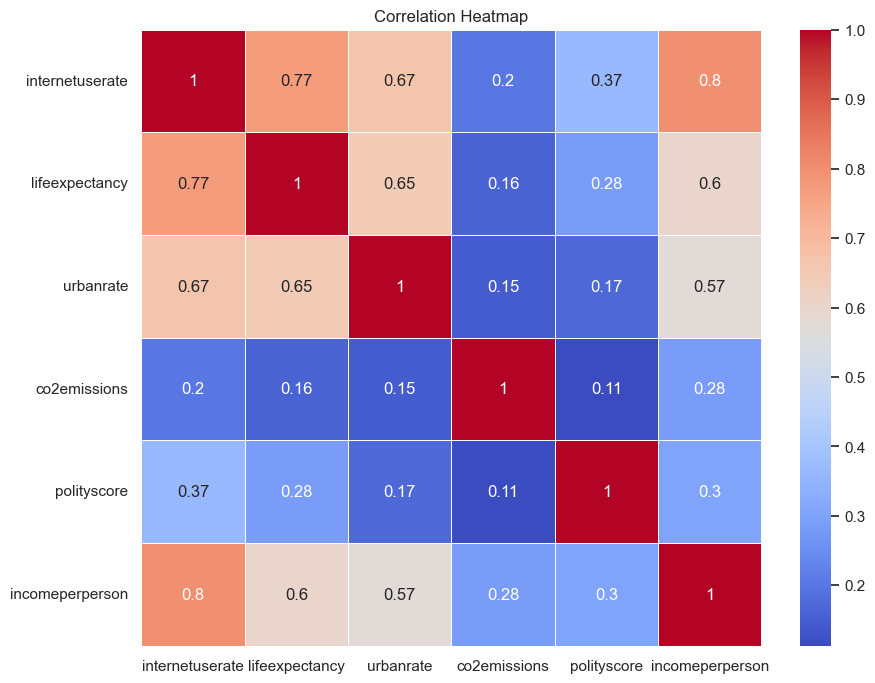

In [36]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(features_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Rotar los labels del eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

### **Diagrama de caja**

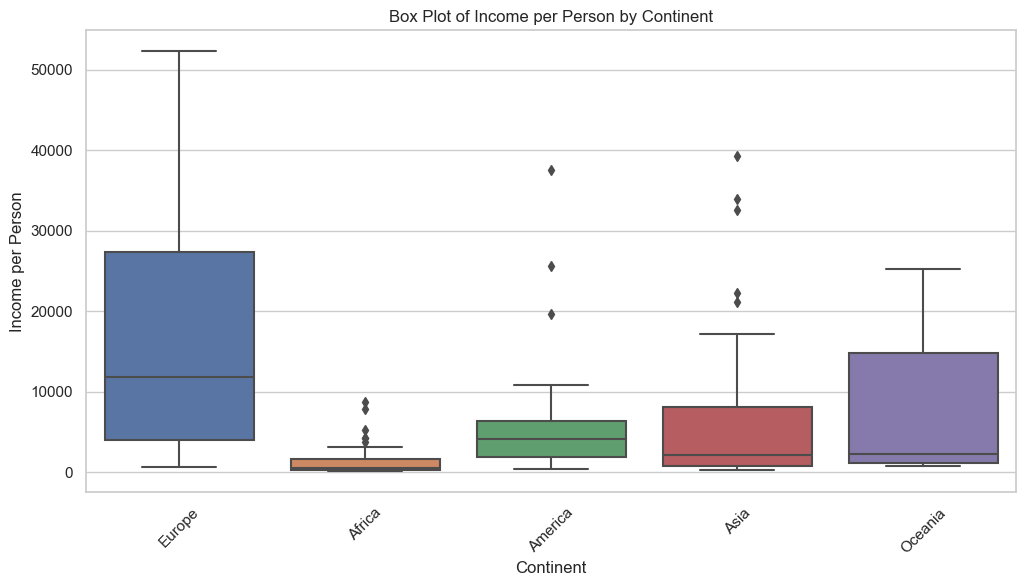

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='incomeperperson', data=dataframe)
plt.xlabel('Continent')
plt.ylabel('Income per Person')
plt.title('Box Plot of Income per Person by Continent')
plt.xticks(rotation=45)
plt.show()

## **Resultados Análisis Bivariado target vs features**

- **internetuserate**: Se observa una fuerte correlación positiva entre la cantidad de usuarios de Internet y el ingreso per cápita. Este hallazgo es coherente con la idea de que el acceso a Internet puede promover el desarrollo económico. Los países con una mayor conectividad tienden a estar más integrados en la economía global, lo que puede facilitar el acceso a información, oportunidades de negocio y educación en línea. Además, una población con habilidades digitales puede ser más competitiva en la economía actual, lo que contribuye a un mayor ingreso per cápita.<br/><br/>

- **lifeexpectancy**: La correlación positiva entre la esperanza de vida y el ingreso per cápita sugiere que los países con un mayor nivel de desarrollo económico tienden a tener una población más saludable y, por lo tanto, una mayor esperanza de vida. Esto se debe a que un mayor ingreso per cápita a menudo se asocia con un acceso más amplio a servicios de atención médica, mejores condiciones de vida y una nutrición adecuada. A su vez, una población más saludable puede contribuir al crecimiento económico a largo plazo.<br/><br/>

- **urbanrate**: La tasa de población urbana está relacionada positivamente con el ingreso per cápita. Los países con una mayor urbanización suelen experimentar un mayor desarrollo económico. Las áreas urbanas tienden a concentrar empleos, servicios y oportunidades, lo que atrae a la población y fomenta el crecimiento económico. Además, las ciudades suelen ser centros de innovación y productividad, lo que contribuye al aumento del ingreso per cápita.<br/><br/>

- **co2emissions**: La correlación entre las emisiones de dióxido de carbono (CO2) y el ingreso per cápita es positiva, pero menos pronunciada que otras variables. Esto sugiere que el nivel de desarrollo económico de un país tiene cierta influencia en sus emisiones de CO2, ya que las economías más grandes y avanzadas a menudo consumen más energía. Sin embargo, otros factores, como las políticas ambientales y la conciencia ecológica, también afectan las emisiones de CO2. Para abordar este desafío, los países pueden centrarse en estrategias de desarrollo sostenible.<br/><br/>

- **polityscore**: La correlación entre el puntaje de democracia (polityscore) y el ingreso per cápita es moderada. Si bien existe una relación positiva, sugiere que la democracia en sí misma no es el único determinante del desarrollo económico. Otros factores económicos, como la inversión extranjera, la infraestructura y las políticas económicas, también desempeñan un papel importante en la determinación del ingreso per cápita. La democracia puede proporcionar un entorno político estable que fomente el crecimiento económico, pero no garantiza automáticamente un alto ingreso per cápita.<br/><br/>

## **2. Preparación de datos**

Antes de realizar la división de datos entre los conjuntos de entrenamiento y test, vamos a validar que no haya datos repetidos, ya que si los llega a haber y hacemos la división de datos esto puede llegar a afectar el modelo.

### **Identificar valores repetidos**

In [38]:
total_rows = dataframe.shape[0]
total_rows

178

In [39]:
duplicated_rows = dataframe.loc[dataframe.duplicated(subset=selected_columns, keep=False)]
duplicated_rows = duplicated_rows.sort_values(by="country")
duplicated_rows

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46,Europe
27,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46,Europe
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46,Asia
116,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46,Asia
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96,Europe
25,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96,Europe
97,Luxembourg,52301.587180,12.84,0.731336,82.5,5.920127e+08,45.900002,0.3,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44,Europe
166,Luxembourg,52301.587180,12.84,0.731336,82.5,5.920127e+08,45.900002,0.3,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44,Europe


In [40]:
len(duplicated_rows) / 2

12.0

In [41]:
print(f"Duplicates: {(len(duplicated_rows)/total_rows/2)*100:.4f}%")

Duplicates: 6.7416%


### **Borrar registros duplicados**

Podemos observar que tenemos una cantidad alta de registros duplicados, y se pude verificar que todas las columnas de los registros están duplicadas, por lo cual parece ser un error de calidad de datos del dataset utilizado, por lo cual se procede a borrar los registros repetidos.

In [42]:
dataframe = dataframe.drop_duplicates()

In [43]:
dataframe.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe
2,Central African Republic,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Africa
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,America
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               166 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        166 non-null    float64
 3   armedforcesrate       162 non-null    float64
 4   breastcancerper100th  165 non-null    float64
 5   co2emissions          164 non-null    float64
 6   femaleemployrate      165 non-null    float64
 7   hivrate               144 non-null    float64
 8   internetuserate       163 non-null    float64
 9   lifeexpectancy        166 non-null    float64
 10  oilperperson          61 non-null     float64
 11  polityscore           156 non-null    float64
 12  relectricperperson    130 non-null    float64
 13  suicideper100th       166 non-null    float64
 14  employrate            165 non-null    float64
 15  urbanrate             1

### **Agregar el índice de desarrollo humano (DHI) como dato complementario**

Como complemento al dataset vamos a agregar el campo índice de desarrollo humano (HDI) el cual es un indicador, elaborado por el Programa de las Naciones Unidas para el Desarrollo (PNUD), que se utiliza para clasificar a los países en tres niveles de desarrollo humano. El índice está compuesto por la esperanza de vida, la educación (tasa de alfabetización, tasa bruta de matriculación en diferentes niveles y asistencia neta) e indicadores de ingreso per cápita. Un país obtiene un DHI más alto cuando la esperanza de vida es mayor, el nivel de educación es mayor y el ingreso nacional bruto INB (PPA, o paridades de poder adquisitivo) per cápita es mayor. Fue desarrollado por un equipo liderado por el economista Amartya Sen. 

In [45]:
# load the data 
df_hdi = pd.read_csv('https://raw.githubusercontent.com/Kmilo29/repository/main/data/taller2/HDI.csv')

In [46]:
df_hdi.head()

,country,hdi
0,Afghanistan,0.478
1,Albania,0.796
2,Algeria,0.745
3,Angola,0.586
4,Argentina,0.842


In [47]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  166 non-null    object 
 1   hdi      165 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


**Ajustamos el nombre del país para poder integrar los dos dataset** 

In [48]:
df_hdi['country'] = df_hdi['country'].replace("Cote d'Ivoire", "Côte d'Ivoire")

### **Integración del nuevo campo**

vamos a unir el dataset df_hdi al dataset principal a traves de su columna country.

In [49]:
dataframe = dataframe.merge(df_hdi[['country', 'hdi']], on='country', how='left')

In [50]:
dataframe.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent,hdi
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe,0.945
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe,0.796
2,Central African Republic,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Africa,0.404
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,America,0.790
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe,0.895


In [51]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               166 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        166 non-null    float64
 3   armedforcesrate       162 non-null    float64
 4   breastcancerper100th  165 non-null    float64
 5   co2emissions          164 non-null    float64
 6   femaleemployrate      165 non-null    float64
 7   hivrate               144 non-null    float64
 8   internetuserate       163 non-null    float64
 9   lifeexpectancy        166 non-null    float64
 10  oilperperson          61 non-null     float64
 11  polityscore           156 non-null    float64
 12  relectricperperson    130 non-null    float64
 13  suicideper100th       166 non-null    float64
 14  employrate            165 non-null    float64
 15  urbanrate             1

### **Análisis univariado de índice de desarrollo humano (HDI)**

---------------------------------------------------------------------------------------------
--------------------------------------hdi--------------------------------------------
---------------------------------------------------------------------------------------------


Estadísticas descriptivas

count    165.000000
mean       0.719073
std        0.155256
min        0.394000
5%         0.467400
25%        0.585000
50%        0.731000
75%        0.846000
95%        0.940800
max        0.962000
Name: hdi, dtype: float64


Número de registros nulos: 1


Número de registros con valor cero: 0




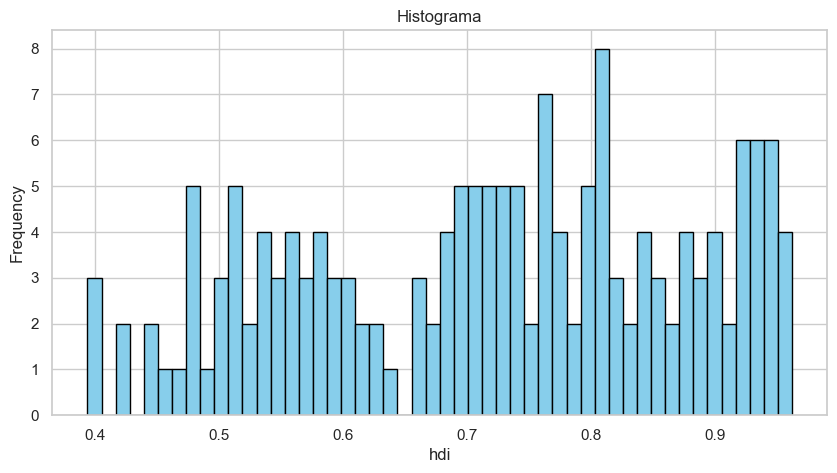

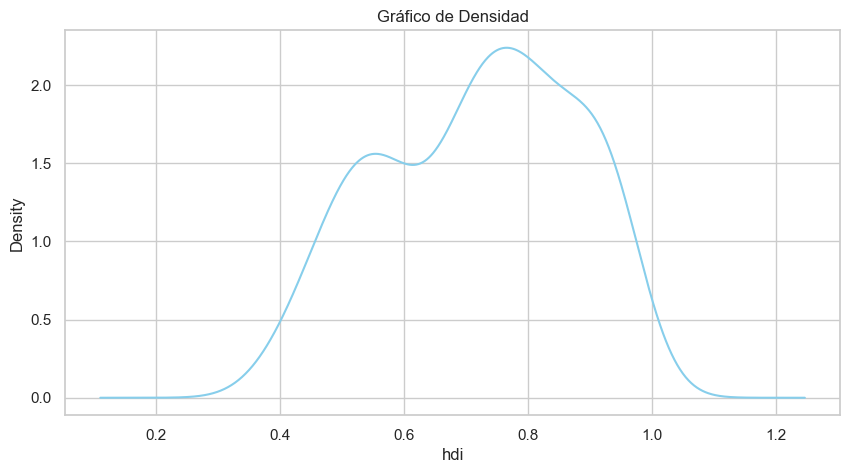

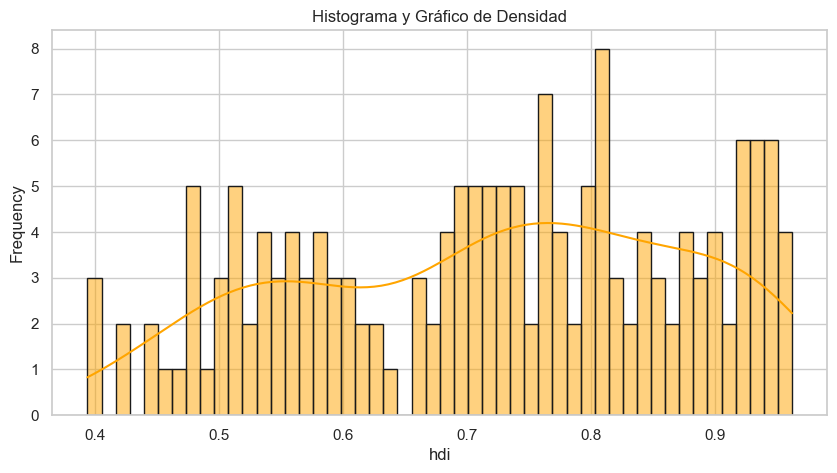

In [52]:
utils.univariate_analysis_continuos_variables(dataframe[['hdi']])

### **Resultados del análisis HDI (Índice de Desarrollo Humano)**

La media del **HDI** en el conjunto de datos es aproximadamente 0.719, lo que sugiere un nivel medio de desarrollo humano en la muestra de países. Esto indica que, en promedio, los países representados tienen un nivel moderado de acceso a la educación, atención médica y un ingreso per cápita decente. La desviación estándar de aproximadamente 0.155 revela que existe cierta variabilidad en los valores del **HDI** alrededor de la media. Esto indica que en la muestra de países hay una dispersión de niveles de desarrollo humano, con algunos países que tienen un desarrollo humano significativamente más alto o más bajo que la media.

### **Análisis bivariado target vs hdi**

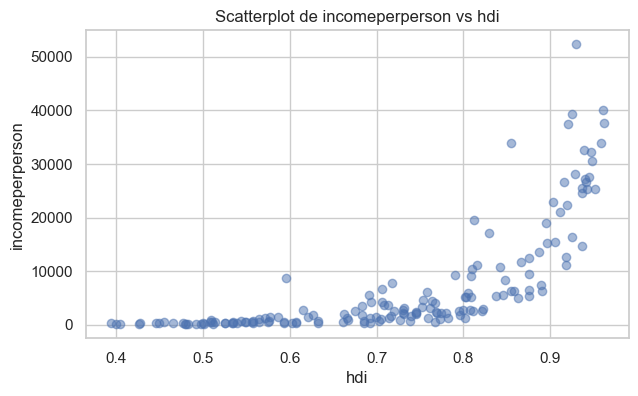

In [53]:
utils.target_vs_features(dataframe[['hdi', 'incomeperperson']], 'incomeperperson')

In [54]:
# features correlation matrix
hdi_correlation_matrix = dataframe[['hdi', 'incomeperperson']].corr()

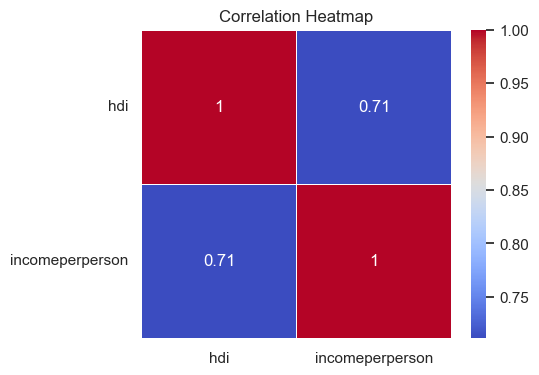

In [55]:
plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(hdi_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Rotar los labels del eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

### **Resultados Análisis Bivariado target vs hdi**

Al analizar la relación entre el Índice de Desarrollo Humano (HDI) y el ingreso per cápita, se observa una correlación positiva fuerte entre ambas variables. El coeficiente de correlación de Pearson de 0.7117 indica que existe una asociación significativa entre un mayor HDI y un mayor ingreso per cápita. Esto sugiere que, en general, los países con un HDI más alto tienden a tener ingresos per cápita más elevados. 

Esta relación tiene sentido desde una perspectiva intuitiva, ya que el HDI se compone de indicadores que abordan la salud, la educación y el nivel de vida. Por lo tanto, es lógico pensar que los países con un HDI más alto también tienen un mejor estándar de vida, lo que a menudo se refleja en ingresos más altos para sus ciudadanos.

## **Limpieza de datos**

### **Crear una copia del dataset**

Para trabajar en el modelo de regresión, a partir de este paso vamos a trabajar sobre una copia del dataset original.

In [56]:
df = dataframe.copy()

In [57]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,continent,hdi
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,Europe,0.945
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,Europe,0.796
2,Central African Republic,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,Africa,0.404
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,America,0.790
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,Europe,0.895


### **Selección de features**

Para la selección de las features nos basamos en los resultados obtenidos en la sección **1. Entendimiento de los datos**, las features para el análisis incluyendo la variable target son:

In [58]:
features = continuous_features + ['polityscore', 'continent', 'hdi']

target = 'incomeperperson'

### **Matriz de correlación entre atributos**

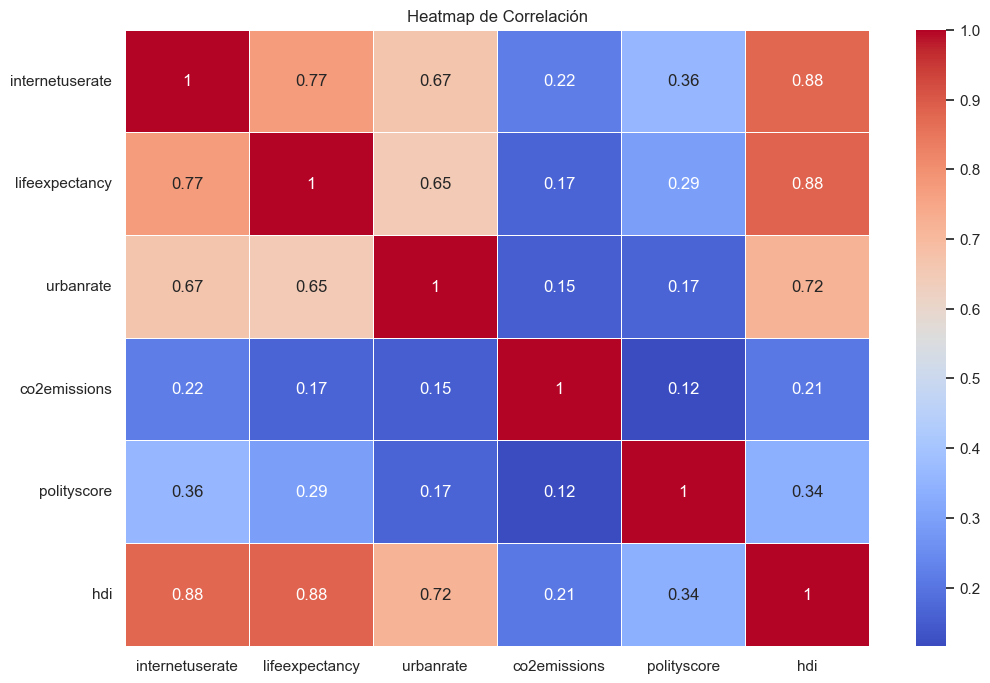

In [59]:
# Correlation matrix
features_correlation = df[features].corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(features_correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlación')

# Rotar los labels del eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

En la matriz de correlación de los atributos se pueden identificar altas correlaciones entre las variables **internetuserate**, **lifeexpectancy** y **hdi**, según la definición El índice está compuesto por la esperanza de vida, la educación (tasa de alfabetización, tasa bruta de matriculación en diferentes niveles y asistencia neta) e indicadores de ingreso per cápita. Lo cual explica su alta correlación con estos atributos. La decisión tomada es dejar los atributos para entrenar un primer modelo y si los resultados obtenidos no son buenos, se procederá a entrenar un modelo eliminando el atributo hdi.

In [60]:
df = df[features+[target]]

In [61]:
df.head()

,internetuserate,lifeexpectancy,urbanrate,co2emissions,polityscore,continent,hdi,incomeperperson
0,69.770394,80.557,61.34,1.633779e+09,10.0,Europe,0.945,27595.091350
1,44.989947,76.918,46.72,2.237473e+08,9.0,Europe,0.796,1914.996551
2,2.300027,48.398,38.58,8.338000e+06,-1.0,Africa,0.404,239.518749
3,70.028599,76.835,39.84,3.616067e+07,NaN,America,0.790,9243.587053
4,53.740217,81.855,68.08,1.900045e+10,10.0,Europe,0.895,18982.269290


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   internetuserate  163 non-null    float64
 1   lifeexpectancy   166 non-null    float64
 2   urbanrate        166 non-null    float64
 3   co2emissions     164 non-null    float64
 4   polityscore      156 non-null    float64
 5   continent        166 non-null    object 
 6   hdi              165 non-null    float64
 7   incomeperperson  163 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.7+ KB


### **Eliminación de outliers de la variable target**

Debido a la alta dispersión de la variable target **incomeperperson** detectado en el análisis univariado, se ha decidido retirar del dataset, los valores que esten por encima del 90%. 

In [63]:
df[target].describe(percentiles=[.25, .5, .75, .95, .99])

count      163.000000
mean      7202.019107
std      10469.295971
min        103.775857
25%        602.502870
50%       2344.896916
75%       8550.031767
95%      32116.462386
99%      39561.370946
max      52301.587180
Name: incomeperperson, dtype: float64

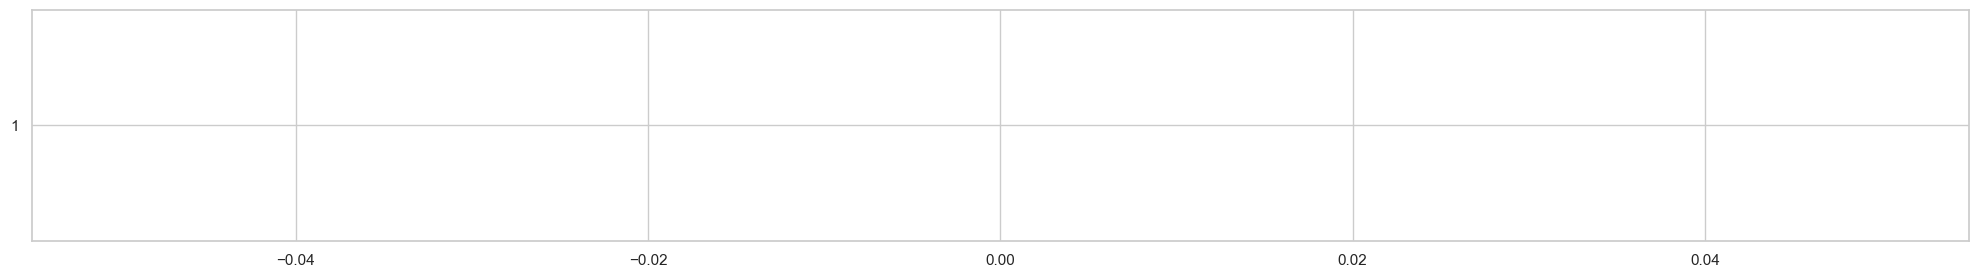

In [64]:
plt.figure(figsize=(25, 3))
plt.boxplot(df[target], showmeans=True, vert=False)
plt.show()

**Se elimina los valores sobre el percentil 90 de la variable target**

In [65]:
df_no_outliers = df.loc[df[target] <= df[target].quantile(.9)]

In [66]:
df_no_outliers.shape

(146, 8)

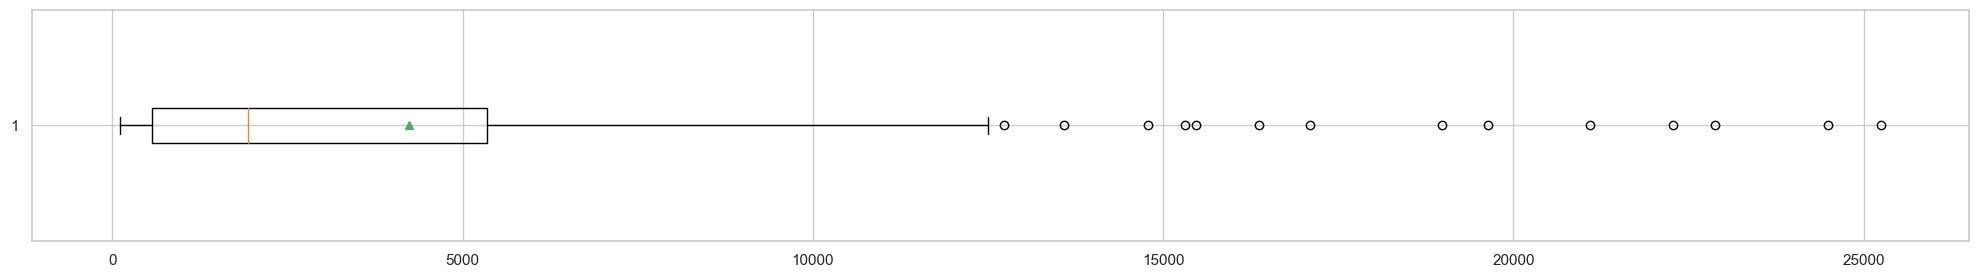

In [67]:
plt.figure(figsize=(25, 3))
plt.boxplot(df_no_outliers[target], showmeans=True, vert=False)
plt.show()

In [68]:
df_no_outliers[target].describe(percentiles=[.25, .5, .75, .95, .99])

count      146.000000
mean      4226.632503
std       5613.080172
min        103.775857
25%        557.976354
50%       1937.420511
75%       5344.507542
95%      16912.469945
99%      23768.136500
max      25249.986060
Name: incomeperperson, dtype: float64

## **División de datos entrenamiento y test**

Primero, se construyen los conjuntos de entrenamiento y test que van a ser utilizados durante el desarrollo del proceso de aprendizaje. Para este caso, se determina utilizar el 20% de los datos suministrados como datos de test.

In [69]:
X = df_no_outliers[features]

In [70]:
Y = df_no_outliers[target]

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [72]:
X_train.shape

(116, 7)

In [73]:
X_test.shape

(30, 7)

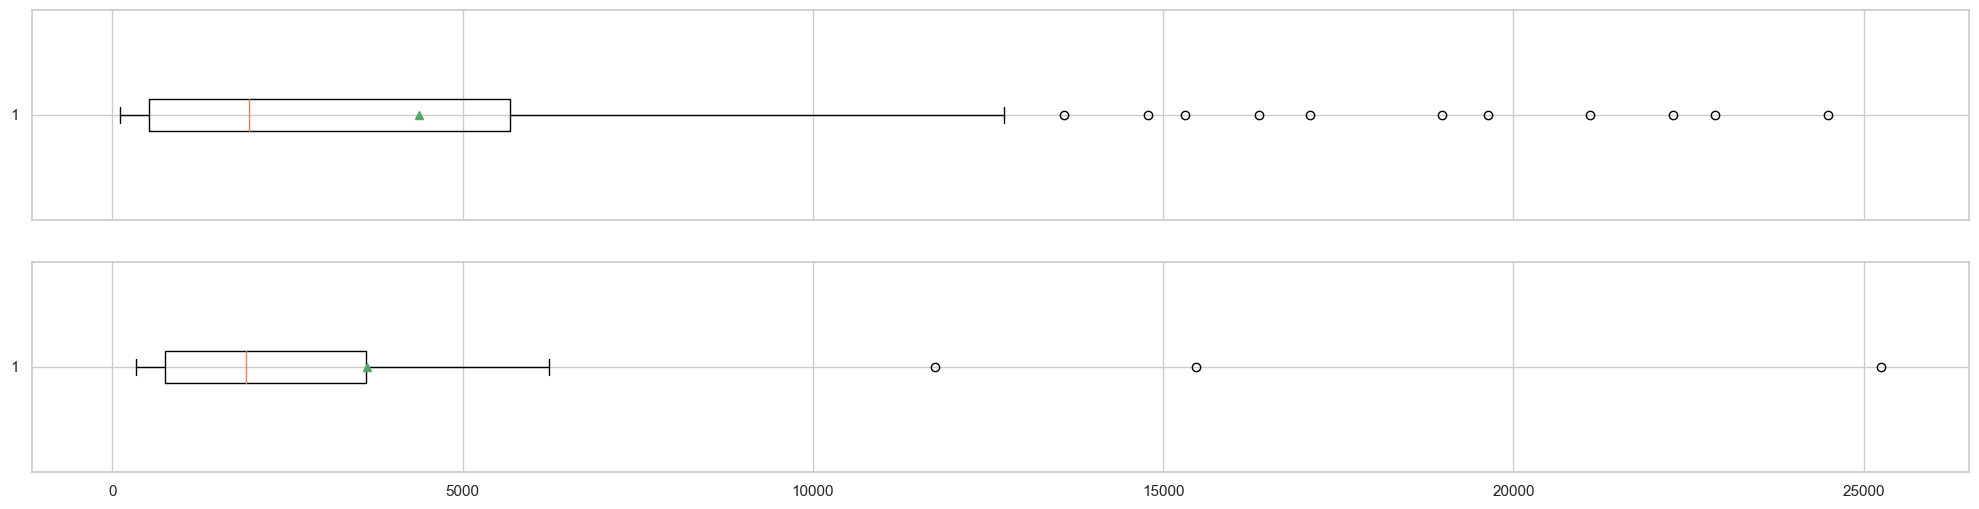

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(25, 6))
ax1.boxplot(Y_train, showmeans=True, vert=False)
ax2.boxplot(Y_test, showmeans=True, vert=False)
plt.show()

## **Preparación de los datos**

a continuación se realiza una serie de pasos para preparar y transformar el conjunto de datos. El objetivo principal es preparar los datos para su uso en un modelo de aprendizaje automático. Aquí está una explicación paso a paso de lo que se está haciendo: 

**1. Selección de Columnas:** Se comienza seleccionando las columnas del conjunto de datos que se utilizarán en el análisis. En este caso, se han definido dos tipos de columnas: columnas numéricas y una columna categórica. 

In [75]:
# Numeric columns
numeric_columns = ['internetuserate', 'lifeexpectancy', 'urbanrate', 'co2emissions', 'polityscore', 'hdi']

# Categorical column
categorical_column = ['continent']

**2. Definición de Transformaciones para Columnas Numéricas:** Se definen las transformaciones que se aplicarán a las columnas numéricas. En este caso, se utilizan dos transformaciones: la primera es un "imputer" (SimpleImputer) que rellenará los valores faltantes en las columnas numéricas con la mediana de cada columna, se utilizara la mediana ya que en los resultados del análisis univariado identificamos una alta dispersión de los datos. La segunda transformación es un escalador (StandardScaler).

In [76]:
# Define transformations for numeric columns
numeric_transformations = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]

**3. Creación de un Codificador One-Hot:** Se crea un codificador "OneHotEncoder" que se utilizará para codificar la columna categórica. Este codificador se configura para manejar valores desconocidos ("handle_unknown='ignore'") y generar matrices densas en lugar de matrices dispersas ("sparse=False").

In [77]:
# Create a OneHotEncoder, but don't fit it yet
categorical_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

**4. Creación de un ColumnTransformer:** Se crea un transformador de columnas ("ColumnTransformer") que aplicará las transformaciones definidas en el paso 2 a las columnas numéricas y utilizará el codificador One-Hot definido en el paso 3 para la columna categórica.

In [78]:
# Create a ColumnTransformer that applies the transformations to the corresponding columns.
preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline(numeric_transformations), numeric_columns),
        ('categorical', categorical_encoder, categorical_column)
    ])

**5. Creación del Pipeline:** Se crea un pipeline que encapsula todo el proceso de transformación. El pipeline se compone de un solo paso llamado "preprocessing" que aplica el transformador de columnas definido en el paso 4.

In [79]:
# Create the complete pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing)
])

**6. Ajuste del Pipeline a los Datos de Entrenamiento:** El pipeline se ajusta a los datos de entrenamiento ("X_train") utilizando el método "fit". Esto significa que se calcularán los parámetros necesarios para aplicar las transformaciones a los datos.

In [80]:
# Fit the pipeline to the data
pipeline.fit(X_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['internetuserate',
                                                   'lifeexpectancy',
                                                   'urbanrate', 'co2emissions',
                                                   'polityscore', 'hdi']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                 

**7. Obtención de Nombres de Columnas Codificadas:** Se obtienen los nombres de las columnas después de aplicar la codificación One-Hot a la columna categórica. Esto se hace mediante la inspección de los pasos internos del pipeline y se obtienen los nombres utilizando el método "get_feature_names_out".

In [81]:
# Get the column names after encoding
encoded_column_names = list(pipeline.named_steps['preprocessing']
                             .named_transformers_['categorical']
                             .get_feature_names_out(input_features=categorical_column))

**8. Combinación de Nombres de Columnas:** Se combinan los nombres de las columnas numéricas y las columnas codificadas en una lista llamada "all_column_names".

In [82]:
# Combine the names of numeric and encoded categorical columns
all_column_names = numeric_columns + encoded_column_names

**9. Aplicación del Pipeline a los Datos de Entrenamiento:** Se aplica el pipeline a los datos de entrenamiento ("X_train") utilizando el método "transform". Esto realiza todas las transformaciones definidas anteriormente en los datos de entrenamiento.

In [83]:
# Apply the pipeline to your data
process_data = pipeline.transform(X_train)

**10. Creación de un DataFrame con los Datos Procesados:** Se crea un DataFrame llamado "X_train_clean" con los datos procesados y los nombres de las columnas definidos en el paso 8. Este DataFrame se utilizará para entrenar el modelo de regresión.

In [84]:
# Create a DataFrame with the processed data and column names
X_train_clean = pd.DataFrame(process_data, columns=all_column_names)

In [85]:
X_train_clean.head()

,internetuserate,lifeexpectancy,urbanrate,co2emissions,polityscore,hdi,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,2.167984,0.907321,1.131885,-0.082992,-1.854747,1.488716,0.0,0.0,1.0,0.0,0.0
1,-0.686859,-0.027969,-1.162426,-0.288916,-1.031046,-0.057261,0.0,0.0,1.0,0.0,0.0
2,0.150965,0.949641,1.101544,0.940218,0.781096,0.442104,0.0,1.0,0.0,0.0,0.0
3,-1.011212,-1.679172,0.189531,-0.286960,-1.195786,-0.802886,1.0,0.0,0.0,0.0,0.0
4,-0.860837,-0.244859,-1.024999,2.531238,0.945836,-0.412972,0.0,0.0,1.0,0.0,0.0


In [86]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   internetuserate    116 non-null    float64
 1   lifeexpectancy     116 non-null    float64
 2   urbanrate          116 non-null    float64
 3   co2emissions       116 non-null    float64
 4   polityscore        116 non-null    float64
 5   hdi                116 non-null    float64
 6   continent_Africa   116 non-null    float64
 7   continent_America  116 non-null    float64
 8   continent_Asia     116 non-null    float64
 9   continent_Europe   116 non-null    float64
 10  continent_Oceania  116 non-null    float64
dtypes: float64(11)
memory usage: 10.1 KB


In [87]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 116 entries, 148 to 10
Series name: incomeperperson
Non-Null Count  Dtype  
--------------  -----  
116 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


## **3. Entrenamiento del modelo de regresión**

Utilizando los indicadores seleccionados como mas relevantes, además de la variable categórica construida **continent** y la variable adicionada **hdi**, se crea un modelo de regresión lineal para predecir el PIB per cápita de un país.

### **Primer modelo de regresión lineal**

In [88]:
regresion = LinearRegression()

In [89]:
regresion.fit(X_train_clean, Y_train)

LinearRegression()

In [90]:
coefficients_df = pd.concat([
    pd.Series(all_column_names),
    pd.Series(regresion.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
coefficients_df

,feature,value
0,internetuserate,3207.854044
1,lifeexpectancy,448.361668
2,urbanrate,1111.772735
3,co2emissions,126.599870
4,polityscore,345.736759
5,hdi,1438.810405
6,continent_Africa,2629.749131
7,continent_America,-845.442496
8,continent_Asia,334.093185
9,continent_Europe,-2768.211464


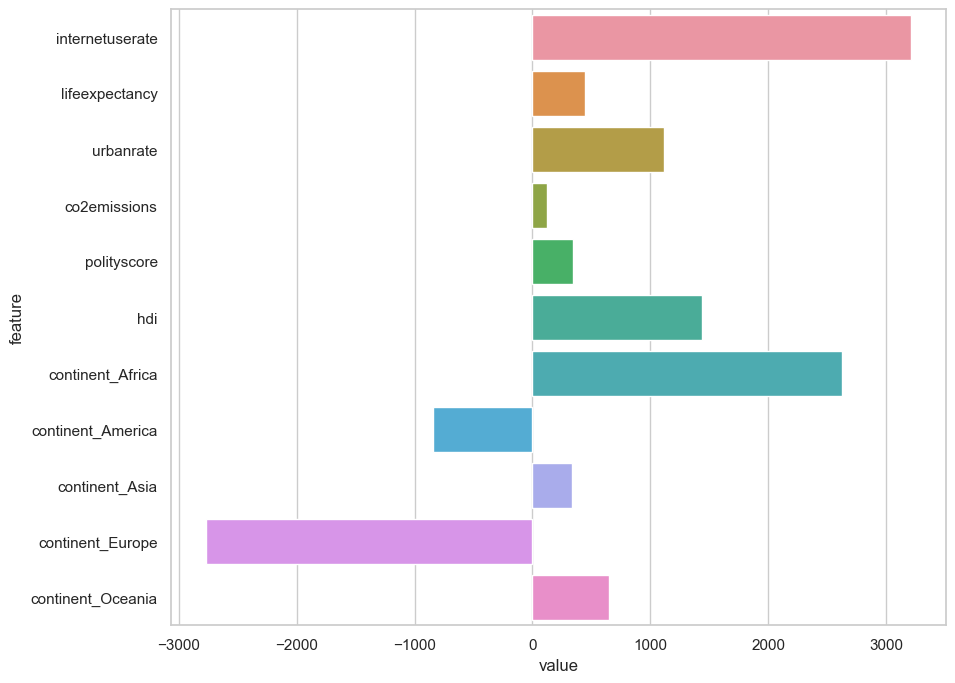

In [91]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=coefficients_df["feature"],
    x=coefficients_df["value"],
    orient="h"
)
plt.show()

In [92]:
regresion.intercept_

4018.5748061785703

### Validación (evaluación) del modelo

La forma más básica para saber que tan bien se comporta el modelo es midiendo que tanto se alejan las estimaciones o predicciones del mismo respecto a la variable objetivo real. Esta medición se puede hacer tanto para el conjunto de datos de entrenamiento como para el de prueba.

### Transformación al conjunto test

In [93]:
# Applies the same transformations to the test set
X_test_clean = pipeline.transform(X_test)

# Creates a DataFrame with the processed data and the column names
X_test_clean = pd.DataFrame(X_test_clean, columns=all_column_names)

In [94]:
X_test_clean.head()

,internetuserate,lifeexpectancy,urbanrate,co2emissions,polityscore,hdi,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,0.536355,0.641059,0.077091,0.362878,0.945836,0.873062,0.0,0.0,0.0,1.0,0.0
1,-0.646006,-1.419236,-1.763890,-0.293979,-0.701566,-1.151757,1.0,0.0,0.0,0.0,0.0
2,0.385080,1.194122,0.479555,-0.284791,1.110576,0.790974,0.0,1.0,0.0,0.0,0.0
3,1.644330,1.411219,1.097974,0.709112,1.110576,1.447672,0.0,0.0,0.0,1.0,0.0
4,0.707392,0.668235,0.506326,-0.293846,0.286875,0.448944,0.0,0.0,1.0,0.0,0.0


**Mean Absolute Error (MAE)**

In [95]:
train_mae_model_1 = mean_absolute_error(Y_train, regresion.predict(X_train_clean))
test_mae_model_1 = mean_absolute_error(Y_test, regresion.predict(X_test_clean))

print("Train MAE (Regression):", train_mae_model_1)
print("Test MAE (Regression):", test_mae_model_1)

Train MAE (Regression): 2409.7156923870048
Test MAE (Regression): 3020.893474226797


**Root Mean Squeared Error (RMSE)**

In [96]:
train_rmse_model_1 = np.sqrt(mean_squared_error(Y_train, regresion.predict(X_train_clean)))
test_rmse_model_1 = np.sqrt(mean_squared_error(Y_test, regresion.predict(X_test_clean)))

print("Train RMSE (Regression):", train_rmse_model_1)
print("Test RMSE (Regression):", test_rmse_model_1)

Train RMSE (Regression): 3336.234200596059
Test RMSE (Regression): 3709.956561598222


**R² ajustado**

El coeficiente de determinación ajustado, conocido como R-cuadrado ajustado o R² ajustado, es una métrica que se utiliza para evaluar la calidad de un modelo de regresión. A diferencia del R-cuadrado común (R²), que simplemente indica la proporción de la varianza explicada por el modelo, el R² ajustado tiene en cuenta el número de predictores o características en el modelo. Ayuda a penalizar la inclusión de características irrelevantes o redundantes en el modelo.

In [97]:
# Calculate the R-squared of the model.
r2 = r2_score(Y_test, regresion.predict(X_test_clean))

# Get the number of observations and predictor variables.
n = len(X_test_clean)
k = X_test_clean.shape[1]

# Calculates the adjusted R-squared
adjusted_r2_m1 = 1 - ((n - 1) / (n - k - 1)) * (1 - r2)

print("R² ajustado:", adjusted_r2_m1)

R² ajustado: 0.1909849955698374


### **Análisis del error**

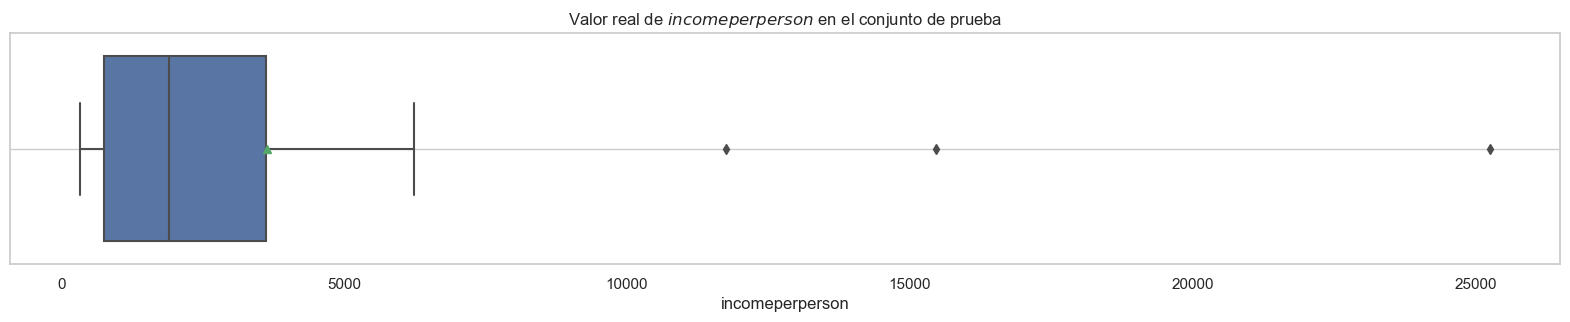

In [98]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=Y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{incomeperperson}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [99]:
Y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       30.000000
mean      3631.792193
std       5324.942362
min        336.368749
25%        745.434377
50%       1902.097750
75%       3617.593334
99%      22411.400030
max      25249.986060
Name: incomeperperson, dtype: float64

Según los resultados obtenidos tanto en el **MAE** como en el **RMSE** para los conjuntos de datos de entrenamiento y prueba, se evidencia un error significativamente elevado en ambos casos en comparación con los valores del conjunto de prueba. Esto sugiere que nuestro modelo está experimentando un caso de **underfitting**. Para abordar esta situación, una posible solución sería la inclusión de más y mejores datos, pero lamentablemente no contamos con acceso a más datos en este escenario particular. Por lo tanto, una alternativa que consideraremos es la utilización de un modelo más complejo.

### **Segundo modelo de regresión polinomial de grado 2**

Dado que, durante el análisis bivariado de la variable objetivo en relación con las características, hemos observado en las gráficas de dispersión que, en la mayoría de los casos, se muestra un patrón que se asemeja a una función parabólica, hemos decidido desarrollar un modelo de regresión polinómica de segundo grado para capturar y representar adecuadamente este comportamiento.

In [100]:
# Create polynomial characteristics of degree 2
poly = PolynomialFeatures(degree=2)

In [101]:
X_train_poly = poly.fit_transform(X_train_clean)
X_test_poly = poly.transform(X_test_clean)

In [102]:
# Train a linear regression model with polynomial characteristics.
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, Y_train)

LinearRegression()

In [103]:
coefficients_df_poly = pd.concat([
    pd.Series(all_column_names),
    pd.Series(regression_poly.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
coefficients_df_poly


,feature,value
0,internetuserate,5.499799e+16
1,lifeexpectancy,1.426347e+03
2,urbanrate,3.229684e+03
3,co2emissions,3.089816e+02
4,polityscore,5.158350e+03
5,hdi,-1.255556e+03
6,continent_Africa,1.924162e+02
7,continent_America,1.735311e+03
8,continent_Asia,-1.539979e+03
9,continent_Europe,-1.416071e+02


In [104]:
regression_poly.intercept_

-5.499798944300496e+16

### **Validación (evaluación) del modelo**

**Mean Absolute Error (MAE)**

In [105]:
train_mae_model_2 = mean_absolute_error(Y_train, regression_poly.predict(X_train_poly))
test_mae_model_2 = mean_absolute_error(Y_test, regression_poly.predict(X_test_poly))

print("Train MAE (Polynomial Regression):", train_mae_model_2)
print("Test MAE (Polynomial Regression):", test_mae_model_2)

Train MAE (Polynomial Regression): 2525.6564240543103
Test MAE (Polynomial Regression): 3020.49590191


**Root Mean Squeared Error (RMSE)**

In [106]:
train_rmse_model_2 = np.sqrt(mean_squared_error(Y_train, regression_poly.predict(X_train_poly)))
test_rmse_model_2 = np.sqrt(mean_squared_error(Y_test, regression_poly.predict(X_test_poly)))

print("Train RMSE (Polynomial Regression):", train_rmse_model_2)
print("Test RMSE (Polynomial Regression):", test_rmse_model_2)

Train RMSE (Polynomial Regression): 3404.6404611219805
Test RMSE (Polynomial Regression): 4317.270482281616


Los resultados obtenidos en cuanto al error, medido tanto a través del **MAE** como del **RMSE**, para nuestro segundo modelo en los conjuntos de datos de entrenamiento y prueba, revelan que se ha observado un aumento en el error en ambos casos en comparación con los valores del primer modelo.

Esta observación sugiere que nuestro modelo puede estar enfrentando desafíos debido a las variables que hemos seleccionado. Si recordamos las variables originales: **internetuserate**, **lifeexpectancy** y **hdi**, notamos que presentaban una correlación significativa entre sí, lo que indica una colinealidad entre estas variables. Por lo tanto, hemos tomado la decisión de entrenar un nuevo modelo de regresión, excluyendo la variable **hdi** para abordar este problema.

Además, es importante mencionar que la variable **co2emissions** mostraba una correlación baja con la variable objetivo. Por consiguiente, hemos optado por eliminarla de las características seleccionadas para entrenar el tercer modelo.

## **Tercer modelo de regresión lineal**

In [107]:
# creates a new copy of the original dataframe
m3_df = dataframe.copy()

In [108]:
# selected features
m3_features = ['internetuserate', 'lifeexpectancy', 'urbanrate', 'polityscore', 'continent']

In [109]:
# new data frame
m3_df = m3_df[m3_features+[target]]

In [110]:
# Correlation matrix
m3_correlation_matrix = m3_df.corr()

### **Correlación target vs features**

In [111]:
# Correlation with target
m3_correlation_matrix["incomeperperson"].sort_values(ascending=False)

incomeperperson    1.000000
internetuserate    0.808128
lifeexpectancy     0.606281
urbanrate          0.585350
polityscore        0.287579
Name: incomeperperson, dtype: float64

### **Matriz de correlación entre atributos**

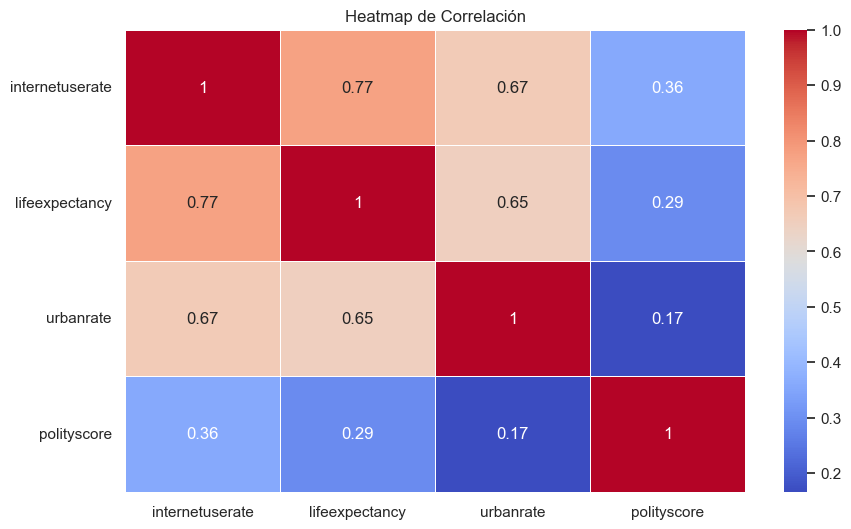

In [112]:
# Correlation matrix between features
m3_features_correlation = df[m3_features].corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(m3_features_correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlación')

# Rotar los labels del eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

### **Remover outliers**

In [113]:
# Remove outliers
m3_df_no_outliers = m3_df.loc[m3_df[target] <= m3_df[target].quantile(.9)]
m3_df_no_outliers.shape

(146, 6)

### **División de datos entrenamiento y test**

In [114]:
# Train test split
m3_X = m3_df_no_outliers[m3_features]
m3_Y = m3_df_no_outliers[target]

m3_X_train, m3_X_test, m3_Y_train, m3_Y_test = train_test_split(m3_X, m3_Y, test_size=0.2, random_state=100)

### **Preparación de datos**

In [115]:
# Numeric columns
m3_numeric_columns = ['internetuserate', 'lifeexpectancy', 'urbanrate', 'polityscore']

# Categorical column
m3_categorical_column = ['continent']


# Create a ColumnTransformer that applies the transformations to the corresponding columns.
m3_preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline(numeric_transformations), m3_numeric_columns),
        ('categorical', categorical_encoder, m3_categorical_column)
    ])
    
# Create the complete pipeline
m3_pipeline = Pipeline([
    ('m3_preprocessing', m3_preprocessing)
])

# Fit the pipeline to the data
m3_pipeline.fit(m3_X_train)

# Get the column names after encoding
m3_encoded_column_names = list(pipeline.named_steps['preprocessing']
                             .named_transformers_['categorical']
                             .get_feature_names_out(input_features=m3_categorical_column))
                             
 # Combine the names of numeric and encoded categorical columns
m3_all_column_names = m3_numeric_columns + m3_encoded_column_names


# Apply the pipeline to your data
m3_process_data = m3_pipeline.transform(m3_X_train)


# Create a DataFrame with the processed data and column names
m3_X_train_clean = pd.DataFrame(m3_process_data, columns=m3_all_column_names)

In [116]:
m3_X_train_clean.head()

,internetuserate,lifeexpectancy,urbanrate,polityscore,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,2.167984,0.907321,1.131885,-1.854747,0.0,0.0,1.0,0.0,0.0
1,-0.686859,-0.027969,-1.162426,-1.031046,0.0,0.0,1.0,0.0,0.0
2,0.150965,0.949641,1.101544,0.781096,0.0,1.0,0.0,0.0,0.0
3,-1.011212,-1.679172,0.189531,-1.195786,1.0,0.0,0.0,0.0,0.0
4,-0.860837,-0.244859,-1.024999,0.945836,0.0,0.0,1.0,0.0,0.0


### **Entrenamiento del modelo**

In [117]:
m3_regresion = LinearRegression()
m3_regresion.fit(m3_X_train_clean, m3_Y_train)

LinearRegression()

### **Validación (evaluación) del modelo**

In [118]:
# Aplica las mismas transformaciones al conjunto de prueba
m3_X_test_clean = m3_pipeline.transform(m3_X_test)

# Crea un DataFrame con los datos procesados y los nombres de columna
m3_X_test_clean = pd.DataFrame(m3_X_test_clean, columns=m3_all_column_names)

**Mean Absolute Error (MAE)**

In [119]:
train_mae_model_3 = mean_absolute_error(m3_Y_train, m3_regresion.predict(m3_X_train_clean))
test_mae_model_3 = mean_absolute_error(m3_Y_test, m3_regresion.predict(m3_X_test_clean))

print("Train MAE (Regression):", train_mae_model_3)
print("Test MAE (Regression):", test_mae_model_3)

Train MAE (Regression): 2431.0923560288875
Test MAE (Regression): 3024.184811538244


**Root Mean Squeared Error (RMSE)**

In [120]:
train_rmse_model_3 = np.sqrt(mean_squared_error(m3_Y_train, m3_regresion.predict(m3_X_train_clean)))
test_rmse_model_3 = np.sqrt(mean_squared_error(m3_Y_test, m3_regresion.predict(m3_X_test_clean)))
print("Train RMSE (Regression):", train_rmse_model_3)
print("Test RMSE (Regression):", test_rmse_model_3)

Train RMSE (Regression): 3386.166962367359
Test RMSE (Regression): 3860.1810826410147


**R² ajustado**

In [121]:
# Calculate the R-squared of the model.
r2_m3 = r2_score(m3_Y_test, m3_regresion.predict(m3_X_test_clean))

# Get the number of observations and predictor variables.
n_m3 = len(m3_X_test_clean)
k_m3 = m3_X_test_clean.shape[1]

# Calculates the adjusted R-squared
adjusted_r2_m3 = 1 - ((n_m3 - 1) / (n_m3 - k_m3 - 1)) * (1 - r2_m3)

print("R² ajustado (Regression M3):", adjusted_r2_m3)

R² ajustado (Regression M3): 0.2117267435461605


## **Comparación de resultados**

In [122]:
# Models' data
model_names = ["Modelo Regresión 1", "Modelo Polinomial 2", "Modelo Regresión 3"]

train_mae = [train_mae_model_1, train_mae_model_2, train_mae_model_3]
test_mae = [test_mae_model_1, test_mae_model_2, test_mae_model_3]

train_rmse = [train_rmse_model_1, train_rmse_model_2, train_rmse_model_3]
test_rmse = [test_rmse_model_1, test_rmse_model_2, test_rmse_model_3]

adj_r2 = [adjusted_r2_m1, '-', adjusted_r2_m3]  # Completa con los valores reales

# Crea un DataFrame con los resultados
results_df = pd.DataFrame({
    "Modelo": model_names,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "R² ajustado": adj_r2
})

# Muestra la tabla
results_df

,Modelo,Train MAE,Test MAE,Train RMSE,Test RMSE,R² ajustado
0,Modelo Regresión 1,2409.715692,3020.893474,3336.234201,3709.956562,0.190985
1,Modelo Polinomial 2,2525.656424,3020.495902,3404.640461,4317.270482,-
2,Modelo Regresión 3,2431.092356,3024.184812,3386.166962,3860.181083,0.211727


Basándonos en los resultados obtenidos, podemos concluir que los tres modelos están experimentando underfitting. A pesar de intentar utilizar un modelo más complejo en el Modelo 2, esta estrategia no generó una mejora significativa en el rendimiento. Dado que no tenemos acceso a más datos, nuestra última opción es ajustar la eliminación de outliers.

Por lo tanto, hemos decidido crear un cuarto modelo de regresión lineal, similar al Modelo 3. Sin embargo, en este cuarto modelo, aumentaremos el umbral para eliminar valores atípicos. Al comparar los resultados, notamos que el Modelo 1 mostró un rendimiento ligeramente mejor que el Modelo 3 en términos de error absoluto en el conjunto de entrenamiento, pero el Modelo 3 logró un valor de R² ajustado superior.

Este último indicador, el R² ajustado, es importante ya que cuantifica cuánto del modelo se ajusta adecuadamente a los datos. Por lo tanto, optamos por usar el Modelo 3 como base para nuestro cuarto modelo, pero con una eliminación más agresiva de outliers. Esto nos permitirá evaluar si un enfoque más conservador con respecto a los outliers mejora el ajuste del modelo a los datos.

## **Cuarto modelo**

In [123]:
# creates a new copy of the original dataframe
m4_df = dataframe.copy()

In [124]:
# new data frame
m4_df = m4_df[m3_features+[target]]

### **Remover outliers**

In [125]:
# Remove outliers
m4_df_no_outliers = m4_df.loc[m4_df[target] <= m4_df[target].quantile(.85)]
m4_df_no_outliers.shape

(138, 6)

In [126]:
### **División de datos entrenamiento y test**
# Train test split
m4_X = m4_df_no_outliers[m3_features]
m4_Y = m4_df_no_outliers[target]

m4_X_train, m4_X_test, m4_Y_train, m4_Y_test = train_test_split(m4_X, m4_Y, test_size=0.2, random_state=100)

### **Preparación de datos**

In [127]:
# Fit the pipeline to the data
m3_pipeline.fit(m4_X_train)

Pipeline(steps=[('m3_preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['internetuserate',
                                                   'lifeexpectancy',
                                                   'urbanrate',
                                                   'polityscore']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['c

In [128]:
# Apply the pipeline to your data
m4_process_data = m3_pipeline.transform(m4_X_train)

In [129]:
# Create a DataFrame with the processed data and column names
m4_X_train_clean = pd.DataFrame(m4_process_data, columns=m3_all_column_names)

### **Entrenamiento del modelo**

In [130]:
m4_regresion = LinearRegression()
m4_regresion.fit(m4_X_train_clean, m4_Y_train)

LinearRegression()

In [131]:
m4_coefficients_df = pd.concat([
    pd.Series(m3_all_column_names),
    pd.Series(m4_regresion.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
m4_coefficients_df

,feature,value
0,internetuserate,2726.570943
1,lifeexpectancy,736.703007
2,urbanrate,645.660924
3,polityscore,303.434738
4,continent_Africa,1151.414016
5,continent_America,-731.817089
6,continent_Asia,-36.170240
7,continent_Europe,-1844.037569
8,continent_Oceania,1460.610881


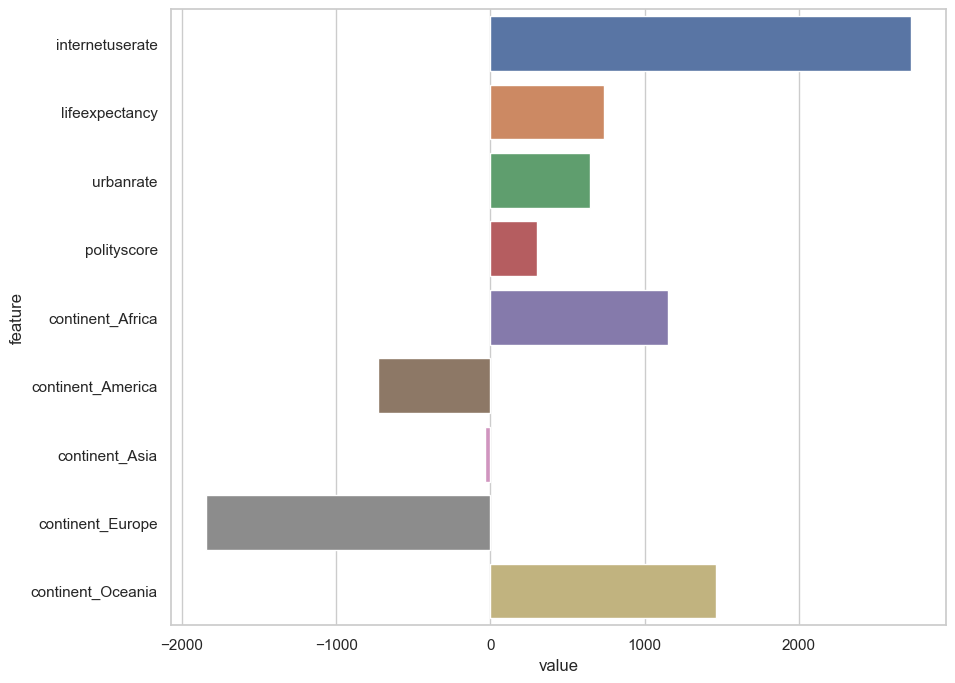

In [132]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=m4_coefficients_df["feature"],
    x=m4_coefficients_df["value"],
    orient="h"
)
plt.show()

In [133]:
m4_regresion.intercept_

3527.4728783288324

### **Validación (evaluación) del modelo**

In [134]:
# Aplica las mismas transformaciones al conjunto de prueba
m4_X_test_clean = m3_pipeline.transform(m4_X_test)

In [135]:
# Crea un DataFrame con los datos procesados y los nombres de columna
m4_X_test_clean = pd.DataFrame(m4_X_test_clean, columns=m3_all_column_names)

**Mean Absolute Error (MAE)**

In [136]:
train_mae_model_4 = mean_absolute_error(m4_Y_train, m4_regresion.predict(m4_X_train_clean))
test_mae_model_4 = mean_absolute_error(m4_Y_test, m4_regresion.predict(m4_X_test_clean))

print("Train MAE (Regression):", train_mae_model_4)
print("Test MAE (Regression):", test_mae_model_4)

Train MAE (Regression): 1774.2337452459717
Test MAE (Regression): 1425.0392381827364


**Root Mean Squeared Error (RMSE)**

In [137]:
train_rmse_model_4 = np.sqrt(mean_squared_error(m4_Y_train, m4_regresion.predict(m4_X_train_clean)))
test_rmse_model_4 = np.sqrt(mean_squared_error(m4_Y_test, m4_regresion.predict(m4_X_test_clean)))
print("Train RMSE (Regression):", train_rmse_model_4)
print("Test RMSE (Regression):", test_rmse_model_4)

Train RMSE (Regression): 2497.2751638269106
Test RMSE (Regression): 1949.693964596853


**R² ajustado**

In [138]:
# Calculate the R-squared of the model.
r2_m4 = r2_score(m4_Y_test, m4_regresion.predict(m4_X_test_clean))

# Get the number of observations and predictor variables.
n_m4 = len(m4_X_test_clean)
k_m4 = m4_X_test_clean.shape[1]

# Calculates the adjusted R-squared
adjusted_r2_m4 = 1 - ((n_m4 - 1) / (n_m4 - k_m4 - 1)) * (1 - r2_m4)

print("R² ajustado (Regression M4):", adjusted_r2_m4)

R² ajustado (Regression M4): 0.2052582223367463


## **Comparación de resultados**

In [139]:
# Models' data
model_names = ["Modelo 1 Regresión", "Modelo 2 Polinomial", "Modelo 3 Regresión", "Modelo 4 Regresión"]

train_mae = [train_mae_model_1, train_mae_model_2, train_mae_model_3, train_mae_model_4]
test_mae = [test_mae_model_1, test_mae_model_2, test_mae_model_3, test_mae_model_4]

train_rmse = [train_rmse_model_1, train_rmse_model_2, train_rmse_model_3, train_rmse_model_4]
test_rmse = [test_rmse_model_1, test_rmse_model_2, test_rmse_model_3, test_rmse_model_4]

adj_r2 = [adjusted_r2_m1, '-', adjusted_r2_m3, adjusted_r2_m4]

results_df = pd.DataFrame({
    "Modelo": model_names,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "R² ajustado": adj_r2
})

# Muestra la tabla
results_df

,Modelo,Train MAE,Test MAE,Train RMSE,Test RMSE,R² ajustado
0,Modelo 1 Regresión,2409.715692,3020.893474,3336.234201,3709.956562,0.190985
1,Modelo 2 Polinomial,2525.656424,3020.495902,3404.640461,4317.270482,-
2,Modelo 3 Regresión,2431.092356,3024.184812,3386.166962,3860.181083,0.211727
3,Modelo 4 Regresión,1774.233745,1425.039238,2497.275164,1949.693965,0.205258


## **Conclusiones Técnicas de los modelos**
<br/>

**Modelo 1 - Regresión Lineal con Gestión de Outliers:** Este modelo utiliza una regresión lineal con cierta gestión de outliers, aunque no tan efectiva como el "Modelo 4." Las métricas de error, MAE y RMSE, indican una cantidad significativa de error en las predicciones del PIB per cápita. El R² ajustado es de aproximadamente 0.191, lo que sugiere que alrededor del 19.1% de la variabilidad en la variable objetivo se explica mediante las variables predictoras. La gestión de outliers puede haber contribuido a esta explicación.

**Modelo 2 - Regresión Polinomial:** A pesar de su enfoque en la introducción de complejidad a través de la transformación polinomial de las variables predictoras, el "Modelo 2" no logra superar significativamente al "Modelo 1" en términos de métricas de error. Las métricas de MAE y RMSE son comparables a las del modelo lineal básico (Modelo 1). Esto plantea dudas sobre la justificación de agregar complejidad adicional a través de un modelo polinomial en este contexto. 

**Modelo 3 - Regresión Lineal sin correlación alta entre sus atributos:** El "Modelo 3" ofrece un R² ajustado ligeramente superior al "Modelo 1", lo que indica un ajuste marginalmente mejor a los datos. Sin embargo, las métricas de error, incluidas MAE y RMSE, son comparables entre ambos modelos. Esto sugiere que, aunque el modelo presenta un ajuste ligeramente mejor, la diferencia en precisión no es sustancial. En contextos donde se valora la simplicidad del modelo, el "Modelo 1" podría ser una elección adecuada.

**Modelo 4 - Regresión Lineal sin correlación alta entre sus atributos y con Gestión de Outliers más alta:** El "Modelo 4" destaca como la elección preferida entre los modelos evaluados, exhibiendo un rendimiento sobresaliente en términos de métricas de error. Tanto en el conjunto de entrenamiento como en el de prueba, presenta valores significativamente más bajos de MAE (Error Absoluto Medio) y RMSE (Error Cuadrático Medio) en comparación con los otros modelos. Esto indica una mayor precisión en las predicciones del PIB per cápita. La implementación de una gestión de outliers, mediante la eliminación de valores extremos en la variable target "incomeperperson," se revela como un paso crucial para mejorar la precisión del modelo. Esta observación destaca la importancia de detectar y tratar adecuadamente los valores atípicos en el proceso de modelado.

## **Análisis de resultados modelo seleccionado (modelo 4)**

### **Validación de supuestos** 

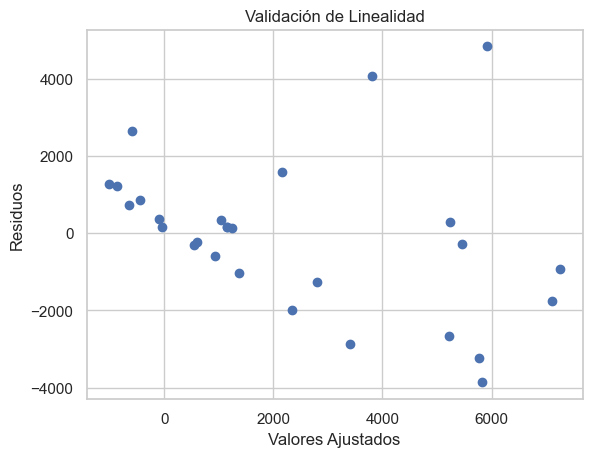

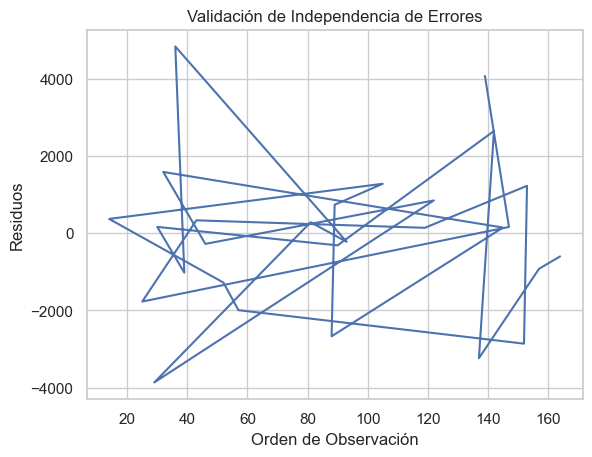

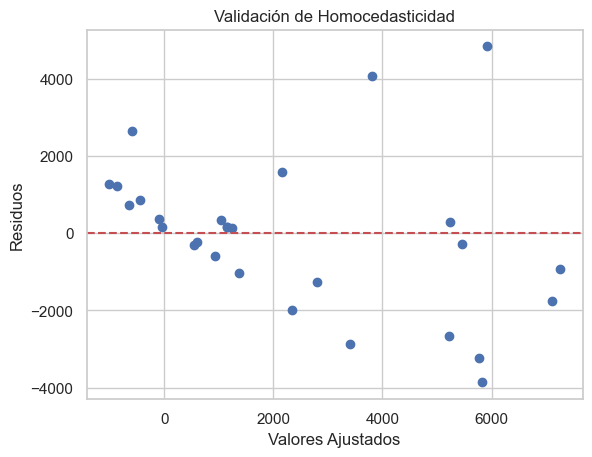

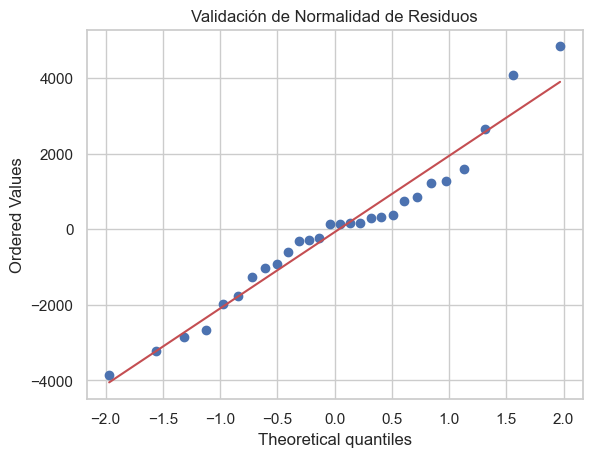

In [140]:
# Get predictions
y_pred = m4_regresion.predict(m4_X_test_clean)

# get the residuals
residuos = m4_Y_test - y_pred

# 1. Linealidad
# Gráfico de dispersión de residuos vs. valores ajustados
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Validación de Linealidad")
plt.show()

# 2. Independencia de Errores
# Gráfico de residuos vs. orden de observación
plt.plot(residuos)
plt.xlabel("Orden de Observación")
plt.ylabel("Residuos")
plt.title("Validación de Independencia de Errores")
plt.show()

# 3. Homocedasticidad
# Gráfico de residuos vs. valores ajustados
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Validación de Homocedasticidad")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 4. Normalidad de Residuos
# Gráfico de probabilidad normal (Q-Q plot)
stats.probplot(residuos, plot=plt)
plt.title("Validación de Normalidad de Residuos")
plt.show()


Después de realizar la validación de supuestos para el Modelo 4 de regresión lineal, se pueden extraer las siguientes conclusiones:

- **Linealidad:** El gráfico de dispersión de residuos vs. valores ajustados muestra una dispersión aleatoria alrededor de la línea cero, lo que indica que no hay patrones evidentes en los residuos en función de los valores ajustados. Esto respalda la suposición de linealidad en el modelo.

- **Independencia de Errores:** El gráfico de residuos vs. orden de observación no muestra ninguna tendencia o patrón claro en los residuos a medida que aumenta el orden de observación. Esto sugiere que los errores son independientes entre sí, lo que es esencial para la validez de las inferencias realizadas por el modelo.

- **Homocedasticidad:** En el gráfico de dispersión de residuos vs. valores ajustados, la dispersión de los residuos parece relativamente constante a lo largo de los valores ajustados, sin una clara forma de embudo o cono. Esto indica que se cumple la suposición de homocedasticidad, lo que significa que la varianza de los errores es constante en todos los niveles de los valores ajustados.

- **Normalidad de Residuos:** El gráfico de probabilidad normal (Q-Q plot) muestra que los residuos se ajustan razonablemente bien a una distribución normal, aunque hay algunas desviaciones leves en los extremos. Sin embargo, estas desviaciones no son tan pronunciadas como para considerar que los residuos no siguen una distribución normal. Esto sugiere que se cumple la suposición de normalidad en gran medida.

En general, los resultados de la validación de supuestos indican que el Modelo 4 de regresión lineal parece cumplir con los supuestos fundamentales de regresión lineal, lo que respalda la validez de las inferencias realizadas por el modelo. 

### **Intepretación de los coeficientes**

In [141]:
m4_coefficients_df = pd.concat([
    pd.Series(m3_all_column_names),
    pd.Series(m4_regresion.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
m4_coefficients_df

,feature,value
0,internetuserate,2726.570943
1,lifeexpectancy,736.703007
2,urbanrate,645.660924
3,polityscore,303.434738
4,continent_Africa,1151.414016
5,continent_America,-731.817089
6,continent_Asia,-36.170240
7,continent_Europe,-1844.037569
8,continent_Oceania,1460.610881


**internetuserate:** Este coeficiente de 2726.57 sugiere que, manteniendo todas las demás variables constantes, un aumento de una unidad en la tasa de usuarios de Internet se asocia con un aumento de aproximadamente 2726.57 unidades en la variable target **incomeperperson.** Esto indica una relación positiva moderadamente fuerte entre la tasa de usuarios de Internet y el ingreso per cápita.

**lifeexpectancy:** Con un coeficiente de 736.70, un aumento de una unidad en la esperanza de vida se relaciona con un aumento de aproximadamente 736.70 unidades en **incomeperperson.** Esto sugiere una correlación positiva entre la esperanza de vida y el ingreso per cápita.

**urbanrate:** El coeficiente de 645.66 implica que un incremento de una unidad en la tasa de urbanización está asociado con un aumento de alrededor de 645.66 unidades en **incomeperperson.** Esto indica que la urbanización tiene una influencia positiva en el ingreso per cápita.

**polityscore:** Con un coeficiente de 303.43, un incremento de una unidad en el puntaje político se relaciona con un aumento de aproximadamente 303.43 unidades en **incomeperperson.** Esto sugiere que un entorno político más favorable se asocia con un mayor ingreso per cápita.

**continent_Africa:** Este coeficiente positivo de 1151.41 indica que, en comparación con otras regiones de referencia, las naciones ubicadas en África tienden a tener un ingreso per cápita más alto en aproximadamente 1151.41 unidades, manteniendo todas las demás variables constantes.

**continent_America:** El coeficiente negativo de -731.82 sugiere que, en comparación con las regiones de referencia, los países de América tienden a tener un ingreso per cápita más bajo en aproximadamente 731.82 unidades.

**continent_Asia:** Con un coeficiente negativo de -36.17, los países de Asia tienden a tener un ingreso per cápita más bajo en aproximadamente 36.17 unidades en comparación con las regiones de referencia.

**continent_Europe:** El coeficiente negativo de -1844.04 indica que los países europeos, en comparación con otras regiones, tienen un ingreso per cápita significativamente más bajo, disminuyendo en alrededor de 1844.04 unidades.

**continent_Oceania:** Este coeficiente positivo de 1460.61 sugiere que las naciones de Oceanía tienden a tener un ingreso per cápita más alto en aproximadamente 1460.61 unidades en comparación con las regiones de referencia.

### **Intepretación del intercepto**

In [142]:
m4_regresion.intercept_

3527.4728783288324

El valor obtenido para el intercepto 3527.47 significa que cuando todas las variables predictoras (como la tasa de usuarios de Internet, la esperanza de vida, la tasa de urbanización, el puntaje político y las variables categóricas de continente) son cero, se estima que el ingreso per cápita promedio es de aproximadamente 3527.47 unidades monetarias.

Sin embargo, es importante tener en cuenta que en el mundo real las variables predictoras, como la tasa de usuarios de Internet, la esperanza de vida y otras, generalmente no pueden ser iguales a cero o no tienen un significado realista cuando se fijan en cero. Por lo tanto, el valor de intercepción en este contexto es más útil como un término de ajuste del modelo para asegurarse de que se ajuste adecuadamente a los datos observados, en lugar de tener una interpretación directa y realista en términos del problema del mundo real que se está modelando. 